<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_851-900.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1070]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1071]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [10:28:02] non-ring atom 1 marked aromatic


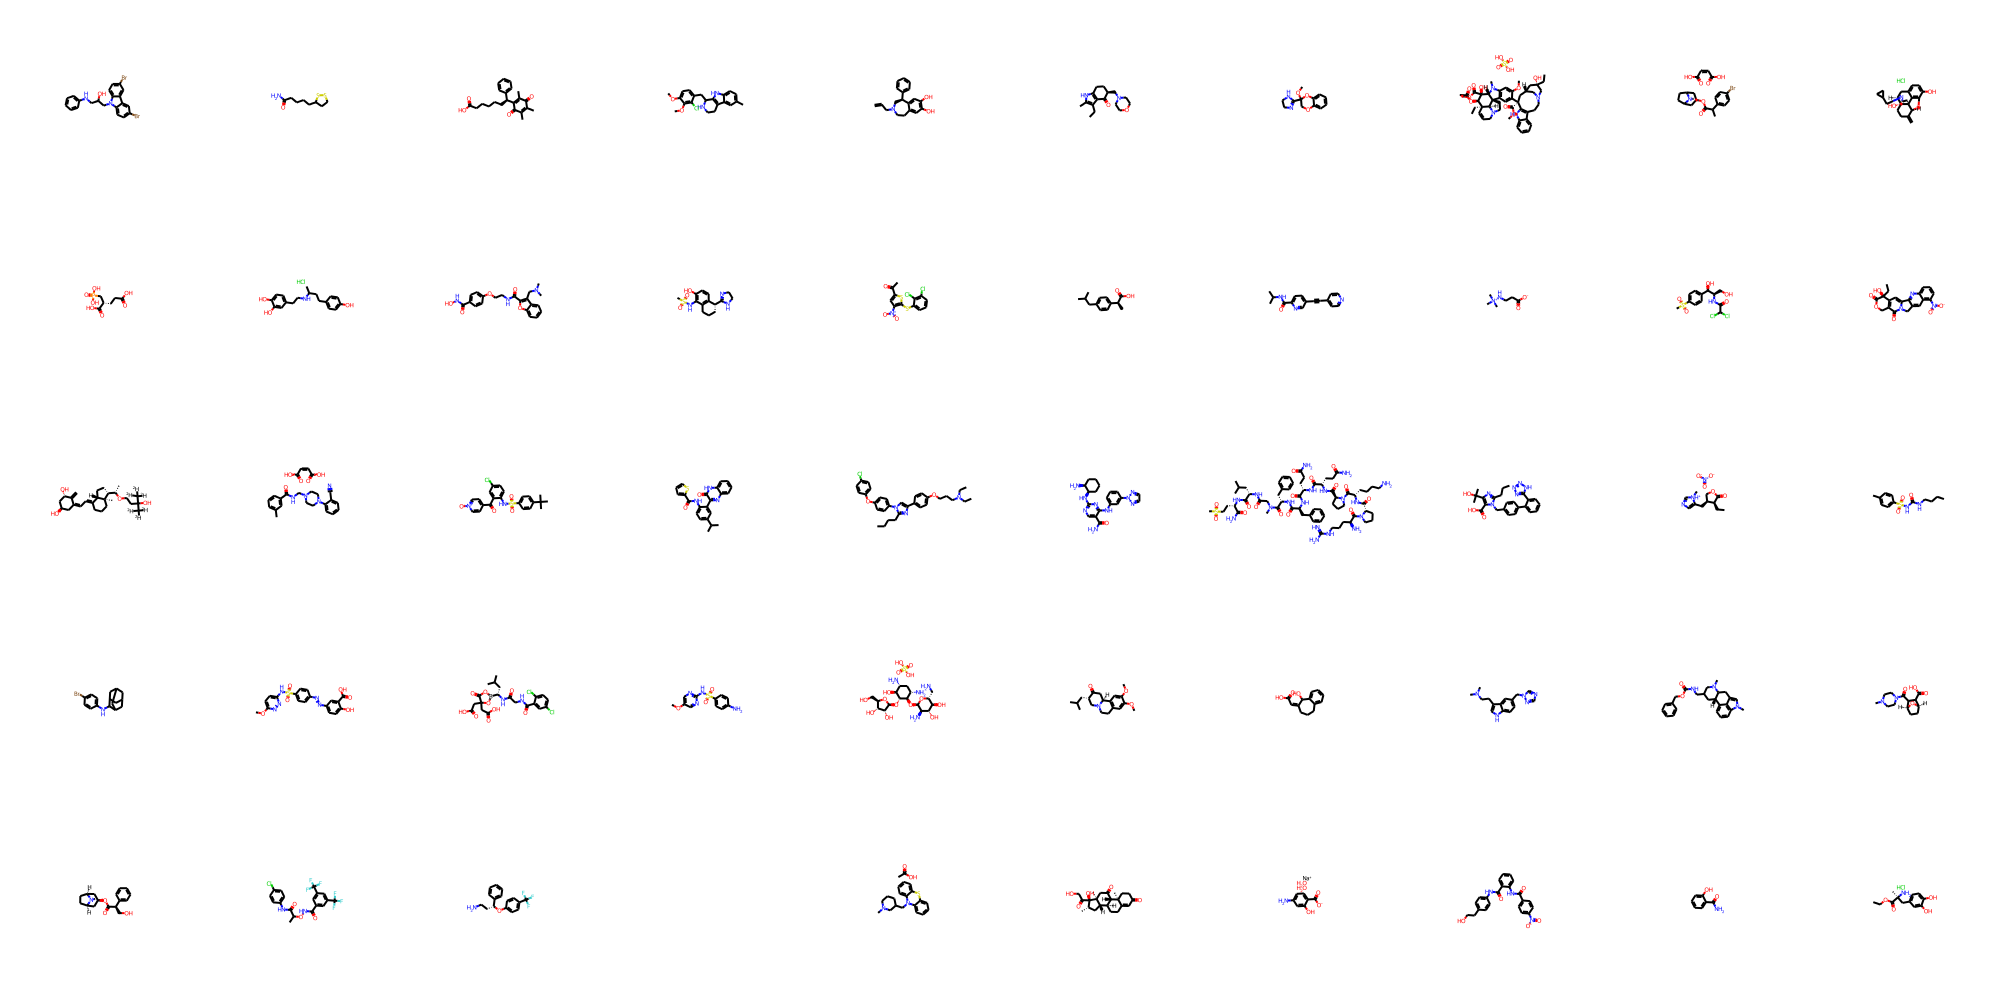

In [1072]:
smiles_list = [

'OC(CNc1ccccc1)Cn1c2ccc(Br)cc2c2cc(Br)ccc21',
'NC(=O)CCCCC1CCSS1',
'CC1=C(C)C(=O)C([C@@H](CCCCCC(=O)O)c2ccccc2)=C(C)C1=O',
'COc1ccc(CC2NCCc3c2[nH]c2ccc(C)cc32)c(Cl)c1OC',
'C=CCN1CCc2cc(O)c(O)cc2[C@H](c2ccccc2)C1',
'CCc1c(C)[nH]c2c1C(=O)[C@H](CN1CCOCC1)CC2',
'COC1(C2=NCCN2)COc2ccccc2O1',
'CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@](C(=O)OC)(c3cc4c(cc3OC)N(C)[C@H]3[C@@](O)(C(=O)OC)[C@H](OC(C)=O)[C@]5(CC)C=CCN6CC[C@]43[C@@H]65)C2)C1.O=S(=O)(O)O',
'CC(C(=O)OC1CC2CCC(C1)N2C)c1ccc(Br)cc1.O=C(O)/C=C\C(=O)O',
'C=C1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@]2(CCN3CC2CC2)[C@H]1O5.Cl',
'O=C(O)CC[C@@H](CP(=O)(O)O)C(=O)O',
'CC(CCc1ccc(O)cc1)NCCc1ccc(O)c(O)c1.Cl',
'CN(C)Cc1c(C(=O)NCCOc2ccc(C(=O)NO)cc2)oc2ccccc12',
'CS(=O)(=O)Nc1c(O)ccc2c1CCC[C@H]2C1=NCCN1',
'CC(=O)c1cc([N+](=O)[O-])c(Sc2cccc(Cl)c2Cl)s1',
'CC(C)Cc1ccc([C@H](C)C(=O)O)cc1',
'CC(C)NC(=O)c1ccc(C#Cc2ccncc2)cn1',
'C[N+](C)(C)NCCC(=O)[O-]',
'CS(=O)(=O)c1ccc([C@@H](O)[C@@H](CO)NC(=O)C(Cl)Cl)cc1',
'CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c([N+](=O)[O-])cccc3nc2-1',
'[2H]C([2H])([2H])C(O)(CCO[C@@H](C)[C@H]1CC[C@H]2/C(=C/C=C3/C[C@@H](O)C[C@H](O)C3=C)CCC[C@]12C)C([2H])([2H])[2H]',
'Cc1cccc(C(=O)NCN2CCN(c3ccccc3C#N)CC2)c1.O=C(O)/C=C\C(=O)O',
'CC(C)(C)c1ccc(S(=O)(=O)Nc2ccc(Cl)cc2C(=O)c2cc[n+]([O-])cc2)cc1',
'CC(C)c1ccc(NC(=O)c2cccs2)c(-c2nc3ccccc3[nH]c2=O)c1',
'CCCCc1nc(-c2ccc(OCCCN(CC)CC)cc2)cn1-c1ccc(Oc2ccc(Cl)cc2)cc1',
'NC(=O)c1cnc(N[C@@H]2CCCC[C@@H]2N)nc1Nc1cccc(-n2nccn2)c1',
'CC(C)C[C@H](NC(=O)CN(C)C(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCCN)NC(=O)[C@@H]1CCCN1C(=O)[C@@H](N)CCCNC(=N)N)C(=O)N[C@@H](CCS(C)(=O)=O)C(N)=O',
'CCCc1nc(C(C)(C)O)c(C(=O)O)n1Cc1ccc(-c2ccccc2-c2nnn[nH]2)cc1',
'CC[C@@H]1C(=O)OC[C@@H]1CC1=CN=C[NH+]1C.O=[N+]([O-])[O-]',
'CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1',
'Brc1ccc(NC2C3CC4CC(C3)CC2C4)cc1',
'COc1ccc(NS(=O)(=O)c2ccc(N=Nc3ccc(O)c(C(=O)O)c3)cc2)nn1',
'CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B1OC(=O)C(CC(=O)O)(CC(=O)O)O1',
'COc1cnc(NS(=O)(=O)c2ccc(N)cc2)nc1',
'NC[C@H]1O[C@H](O[C@@H]2[C@@H](N)C[C@@H](N)[C@H](O)[C@H]2O[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)[C@H](N)[C@@H](O)[C@@H]1O.O=S(=O)(O)O',
'COc1cc2c(cc1OC)[C@@H]1CC(=O)[C@@H](CC(C)C)CN1CC2',
'O=C(O)/C=C1/CCCc2ccccc2C1O',
'CN(C)CCc1c[nH]c2ccc(Cn3cncn3)cc12',
'CN1CC(CNC(=O)OCc2ccccc2)C[C@H]2c3cccc4c3c(cn4C)CC21',
'CN1CCN(C(=O)C2C(C(=O)O)[C@H]3CC[C@@H]2O3)CC1',
'CN1[C@H]2CC[C@@H]1C[C@H](OC(=O)[C@H](CO)c1ccccc1)C2',
'CC(ONC(=O)c1cc(C(F)(F)F)cc(C(F)(F)F)c1)C(=O)Nc1ccc(Cl)cc1',
'NCC[C@@H](Oc1ccc(C(F)(F)F)cc1)c1ccccc1',
'No Data',
'CC(=O)O.CN1CCCC(CN2c3ccccc3Sc3ccccc32)C1',
'C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@]2(C)[C@@]1(O)C(=O)CO',
'Nc1ccc(C(=O)[O-])c(O)c1.O.O.[Na+]',
'O=C(Nc1ccccc1C(=O)Nc1ccc(CCO)cc1)c1ccc([N+](=O)[O-])cc1',
'NC(=O)c1ccccc1O',
'CCOC(=O)[C@@](C)(N)Cc1ccc(O)c(O)c1.Cl',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



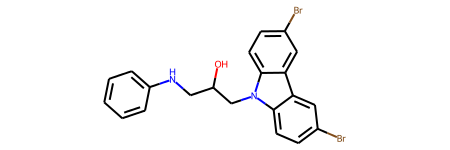

In [1073]:
M1 = mol_list [0]
M1

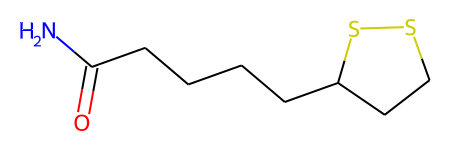

In [1074]:
M2 = mol_list [1]
M2

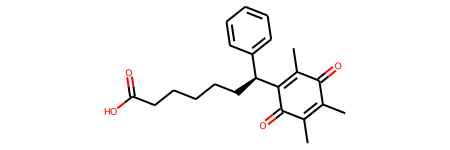

In [1075]:
M3 = mol_list [2]
M3

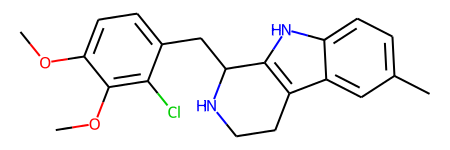

In [1076]:
M4 = mol_list [3]
M4

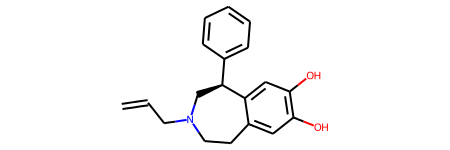

In [1077]:
M5 = mol_list [4]
M5

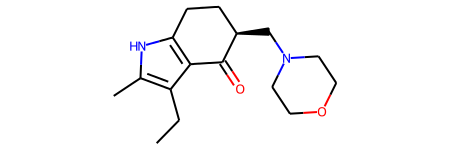

In [1078]:
M6 = mol_list [5]
M6

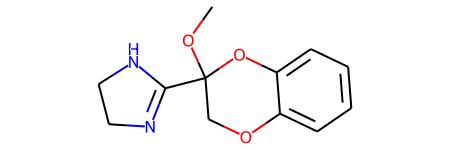

In [1079]:
M7 = mol_list [6]
M7

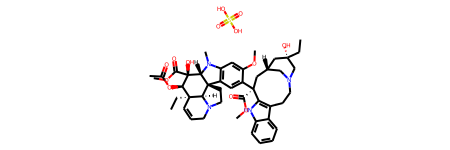

In [1080]:
M8 = mol_list [7]
M8

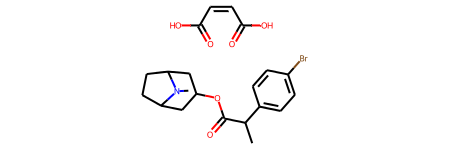

In [1081]:
M9 = mol_list [8]
M9

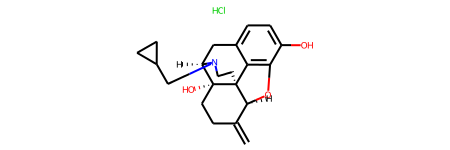

In [1082]:
M10 = mol_list [9]
M10

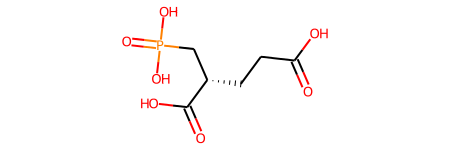

In [1083]:
M11 = mol_list [10]
M11

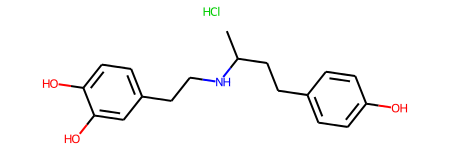

In [1084]:
M12 = mol_list [11]
M12

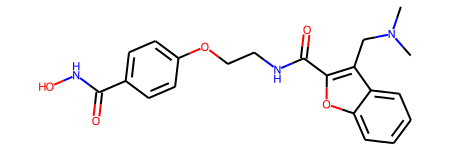

In [1085]:
M13 = mol_list [12]
M13

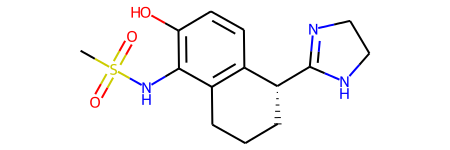

In [1086]:
M14 = mol_list [13]
M14

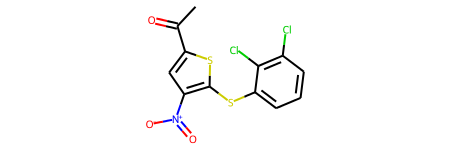

In [1087]:
M15 = mol_list [14]
M15

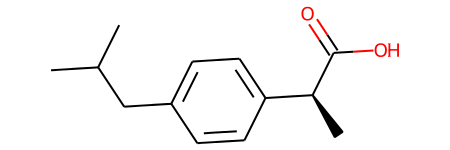

In [1088]:
M16 = mol_list [15]
M16

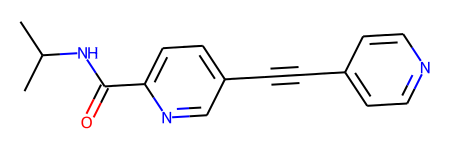

In [1089]:
M17 = mol_list [16]
M17

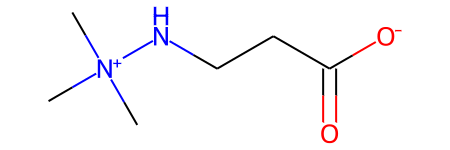

In [1090]:
M18 = mol_list [17]
M18

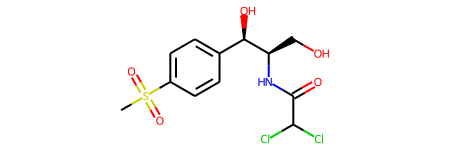

In [1091]:
M19 = mol_list [18]
M19

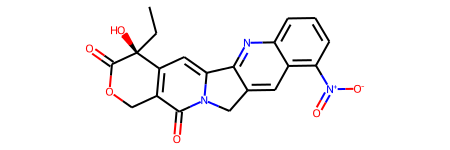

In [1092]:
M20 = mol_list [19]
M20

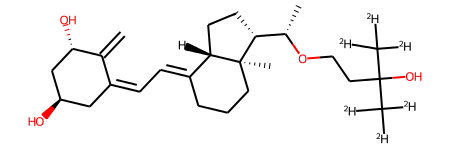

In [1093]:
M21 = mol_list [20]
M21

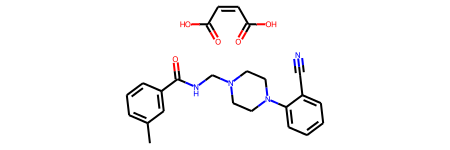

In [1094]:
M22 = mol_list [21]
M22

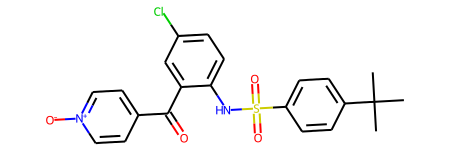

In [1095]:
M23 = mol_list [22]
M23

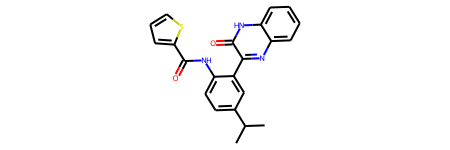

In [1096]:
M24 = mol_list [23]
M24

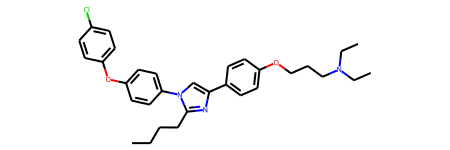

In [1097]:
M25 = mol_list [24]
M25

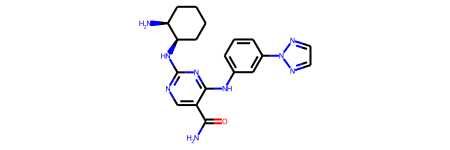

In [1098]:
M26 = mol_list [25]
M26

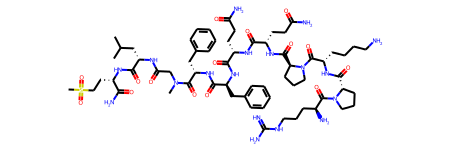

In [1099]:
M27 = mol_list [26]
M27

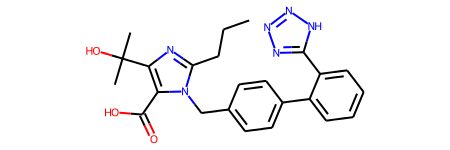

In [1100]:
M28 = mol_list [27]
M28

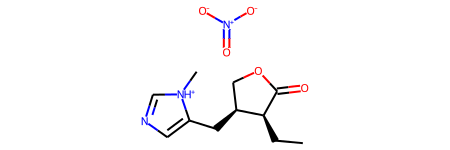

In [1101]:
M29 = mol_list [28]
M29

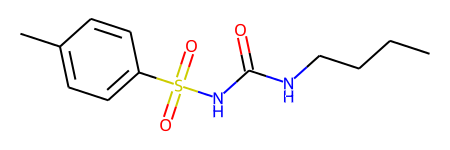

In [1102]:
M30 = mol_list [29]
M30

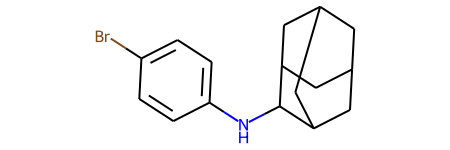

In [1103]:
M31 = mol_list [30]
M31

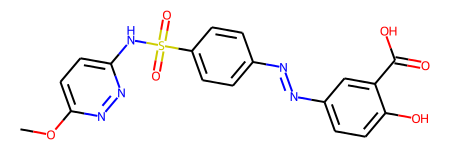

In [1104]:
M32 = mol_list [31]
M32

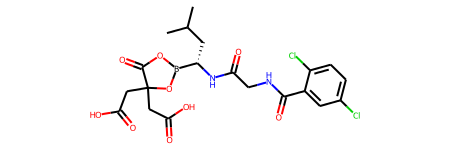

In [1105]:
M33 = mol_list [32]
M33

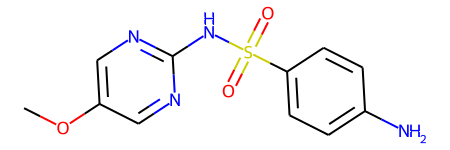

In [1106]:
M34 = mol_list [33]
M34

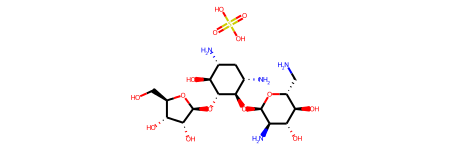

In [1107]:
M35 = mol_list [34]
M35

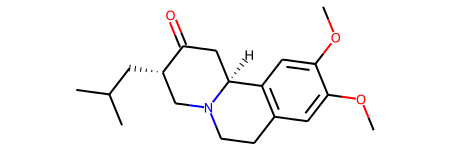

In [1108]:
M36 = mol_list [35]
M36

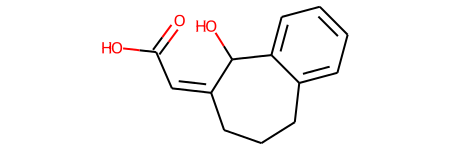

In [1109]:
M37= mol_list [36]
M37

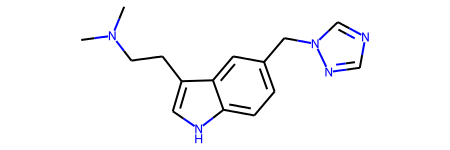

In [1110]:
M38= mol_list [37]
M38

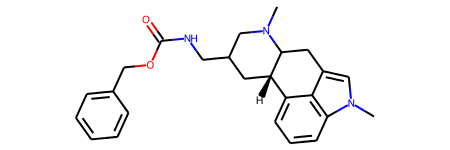

In [1111]:
M39= mol_list [38]
M39

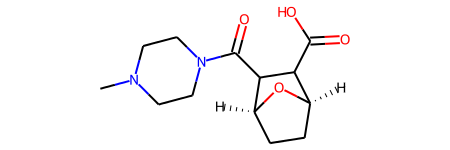

In [1112]:
M40= mol_list [39]
M40

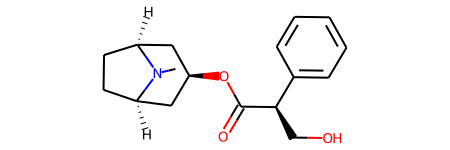

In [1113]:
M41= mol_list [40]
M41

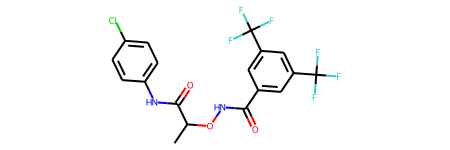

In [1114]:
M42= mol_list [41]
M42

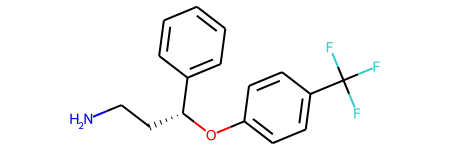

In [1115]:
M43= mol_list [42]
M43

In [1116]:
M44= mol_list [43]
M44

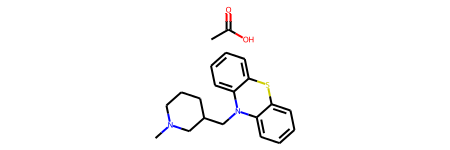

In [1117]:
M45= mol_list [44]
M45

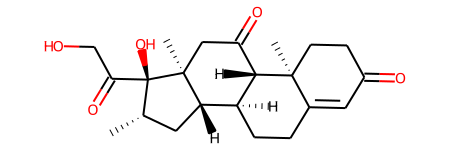

In [1118]:
M46= mol_list [45]
M46

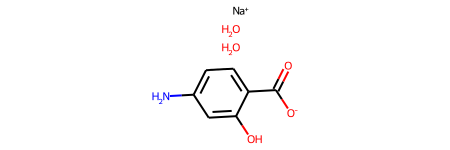

In [1119]:
M47= mol_list [46]
M47

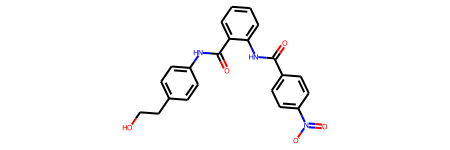

In [1120]:
M48= mol_list [47]
M48

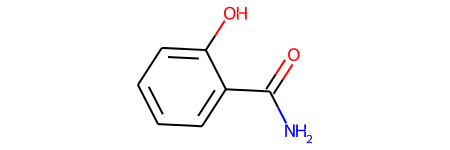

In [1121]:
M49= mol_list [48]
M49

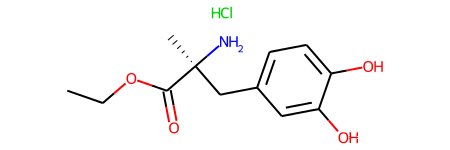

In [1122]:
M50= mol_list [49]
M50

In [1123]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 33,
 45,
 62,
 64,
 80,
 128,
 133,
 175,
 191,
 215,
 227,
 281,
 333,
 339,
 356,
 389,
 392,
 501,
 606,
 607,
 642,
 703,
 706,
 726,
 728,
 766,
 802,
 807,
 849,
 873,
 875,
 898,
 909,
 935,
 997,
 1014]

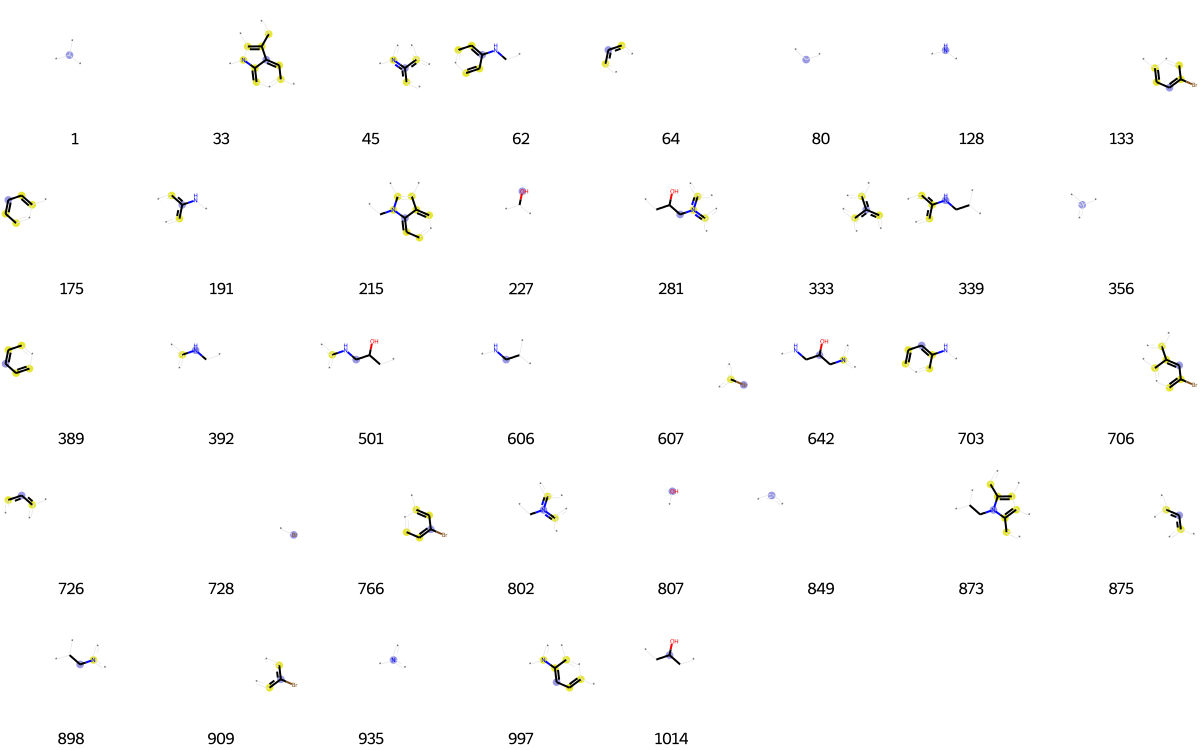

In [1124]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1125]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[80,
 123,
 140,
 147,
 226,
 240,
 243,
 266,
 301,
 334,
 416,
 478,
 540,
 545,
 650,
 675,
 710,
 789,
 807,
 832,
 874,
 887,
 893,
 894,
 926,
 996,
 1019]

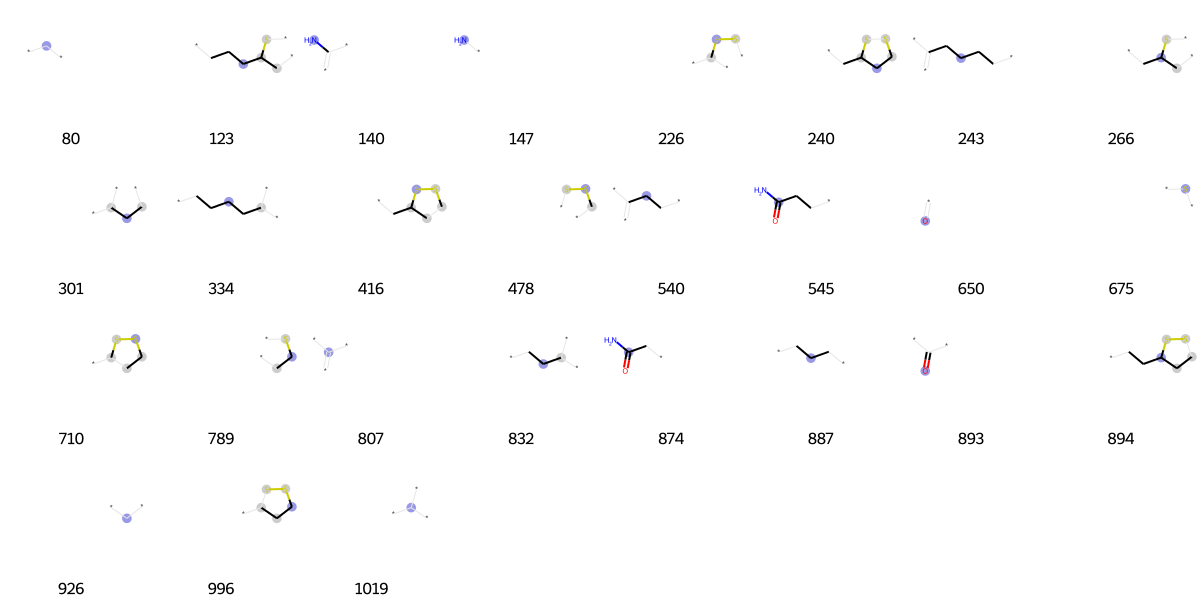

In [1126]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1127]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 64,
 69,
 75,
 80,
 86,
 119,
 175,
 216,
 223,
 243,
 245,
 247,
 259,
 263,
 314,
 341,
 356,
 389,
 452,
 540,
 557,
 650,
 675,
 698,
 713,
 726,
 739,
 807,
 849,
 858,
 867,
 887,
 893,
 944]

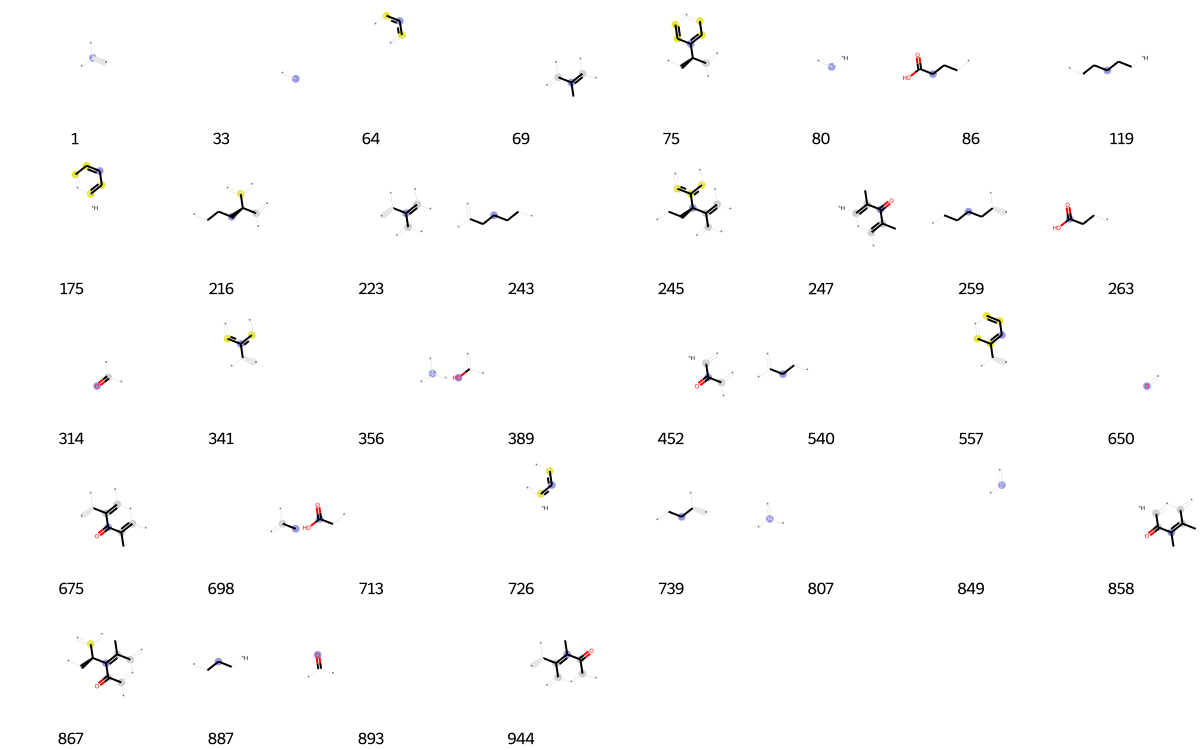

In [1128]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1129]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 80,
 87,
 90,
 94,
 115,
 119,
 175,
 209,
 229,
 235,
 249,
 275,
 305,
 324,
 325,
 333,
 338,
 356,
 361,
 381,
 458,
 474,
 483,
 512,
 561,
 575,
 613,
 659,
 695,
 698,
 714,
 717,
 721,
 726,
 791,
 799,
 812,
 827,
 841,
 849,
 875,
 915,
 926,
 946,
 947,
 956,
 1011,
 1013,
 1019]

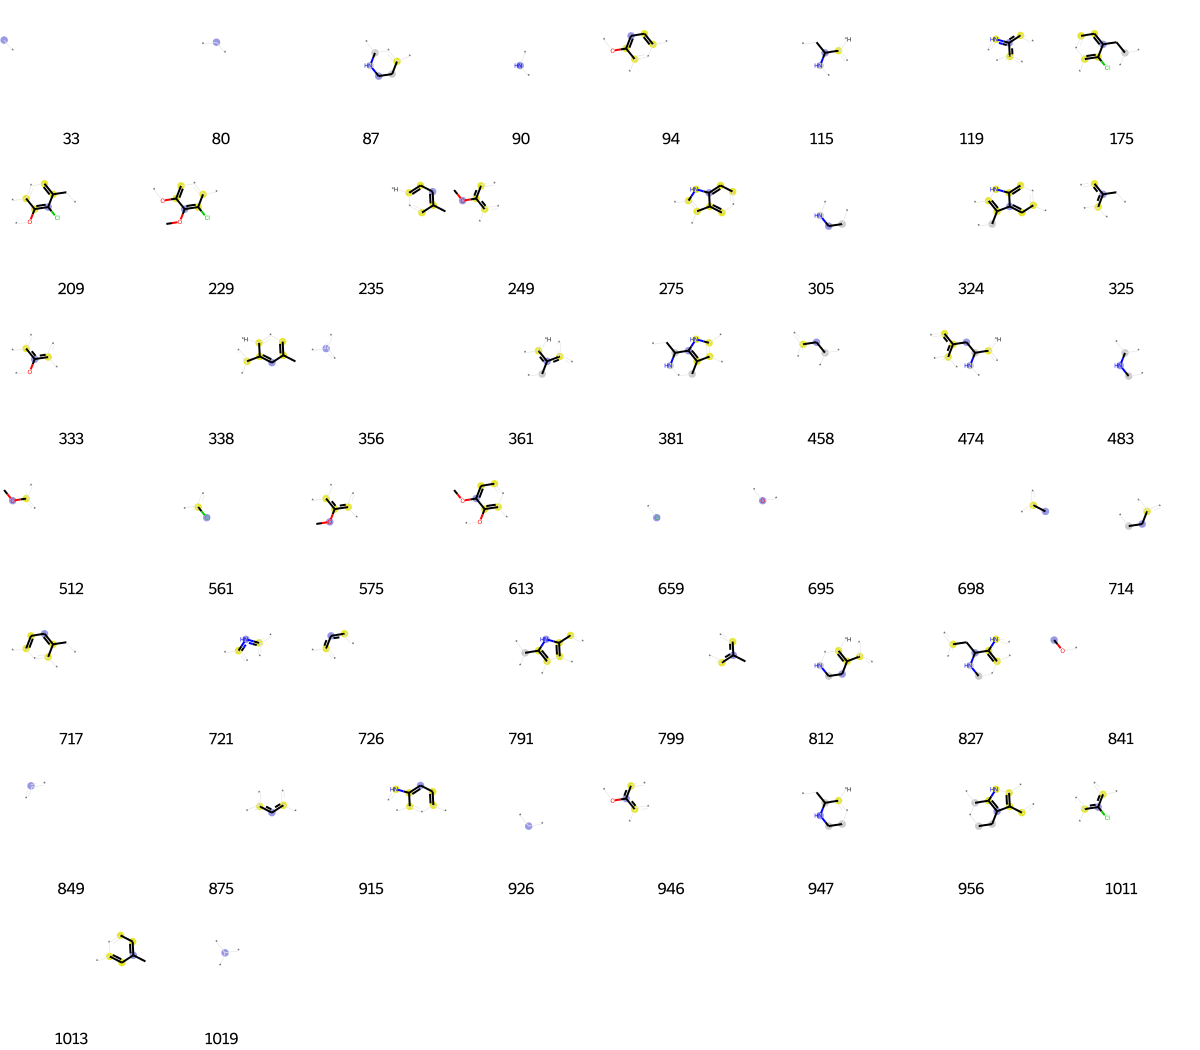

In [1130]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1131]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[3,
 20,
 64,
 80,
 171,
 175,
 189,
 208,
 212,
 255,
 298,
 342,
 356,
 389,
 456,
 479,
 502,
 573,
 578,
 583,
 589,
 621,
 636,
 639,
 654,
 694,
 714,
 726,
 735,
 739,
 767,
 796,
 807,
 814,
 849,
 864,
 875,
 926,
 935,
 940,
 1019]

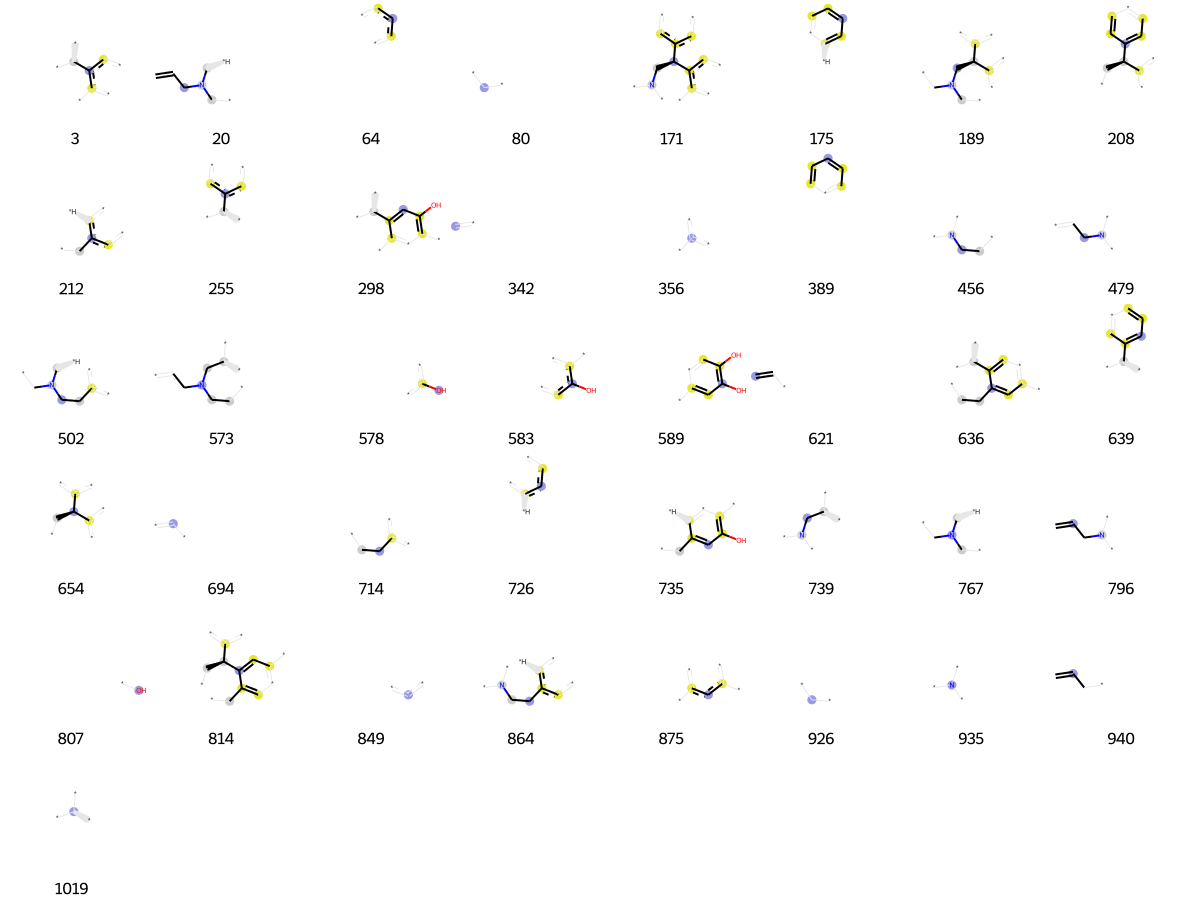

In [1132]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1133]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[33,
 80,
 90,
 97,
 122,
 238,
 276,
 294,
 301,
 314,
 356,
 381,
 410,
 417,
 422,
 441,
 452,
 456,
 479,
 523,
 562,
 587,
 650,
 656,
 664,
 676,
 692,
 698,
 714,
 721,
 723,
 767,
 775,
 805,
 825,
 908,
 926,
 935,
 950,
 975,
 1010,
 1019]

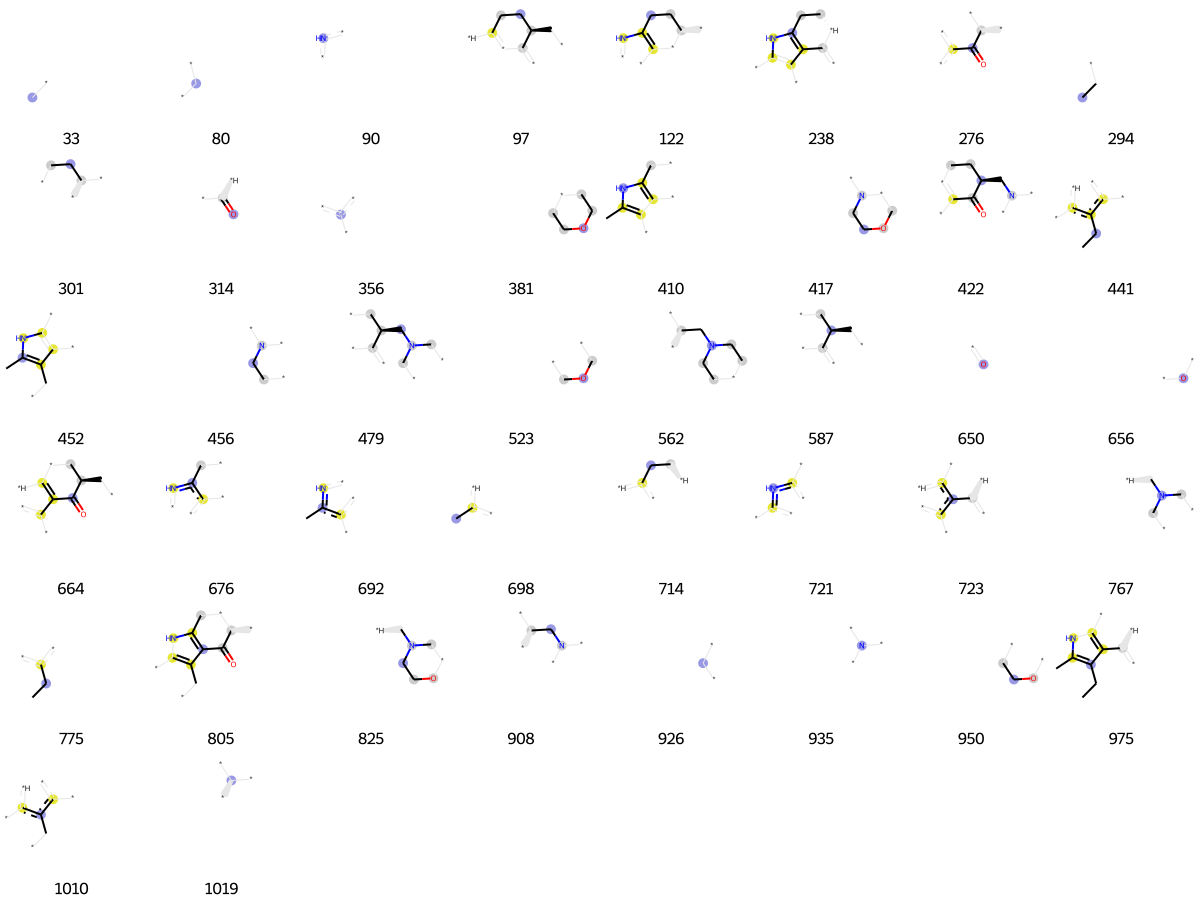

In [1134]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1135]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[32,
 33,
 36,
 64,
 89,
 90,
 143,
 175,
 180,
 200,
 258,
 300,
 305,
 313,
 356,
 378,
 441,
 457,
 572,
 623,
 656,
 695,
 707,
 711,
 726,
 836,
 841,
 842,
 849,
 881,
 926,
 960,
 985,
 993,
 1016]

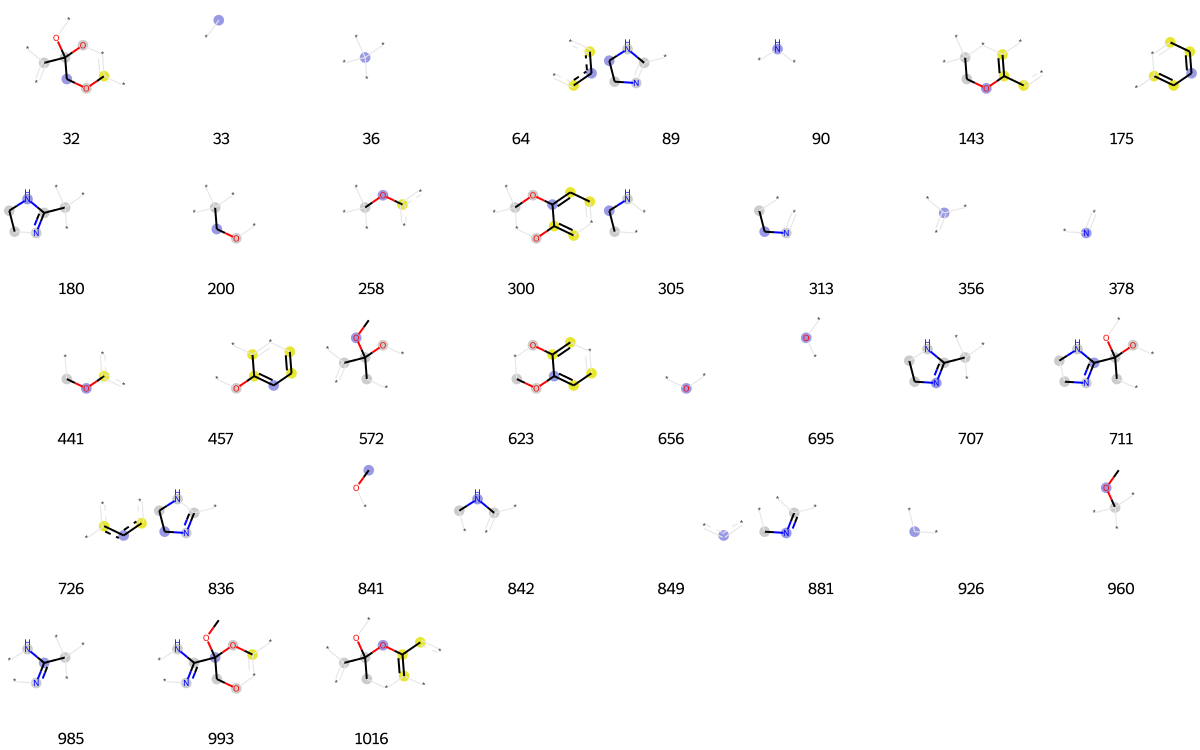

In [1136]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1137]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[0,
 8,
 11,
 20,
 33,
 36,
 51,
 54,
 64,
 67,
 68,
 80,
 83,
 90,
 96,
 102,
 104,
 119,
 121,
 128,
 130,
 138,
 147,
 157,
 174,
 175,
 197,
 200,
 214,
 215,
 249,
 270,
 271,
 275,
 288,
 294,
 309,
 327,
 333,
 343,
 350,
 356,
 361,
 362,
 376,
 413,
 420,
 422,
 442,
 452,
 456,
 512,
 521,
 545,
 547,
 549,
 588,
 592,
 602,
 638,
 650,
 679,
 687,
 695,
 710,
 714,
 721,
 726,
 738,
 739,
 759,
 787,
 791,
 807,
 830,
 833,
 839,
 841,
 849,
 873,
 875,
 878,
 882,
 893,
 924,
 926,
 928,
 930,
 932,
 935,
 938,
 946,
 956,
 978,
 991,
 1004,
 1017,
 1019]

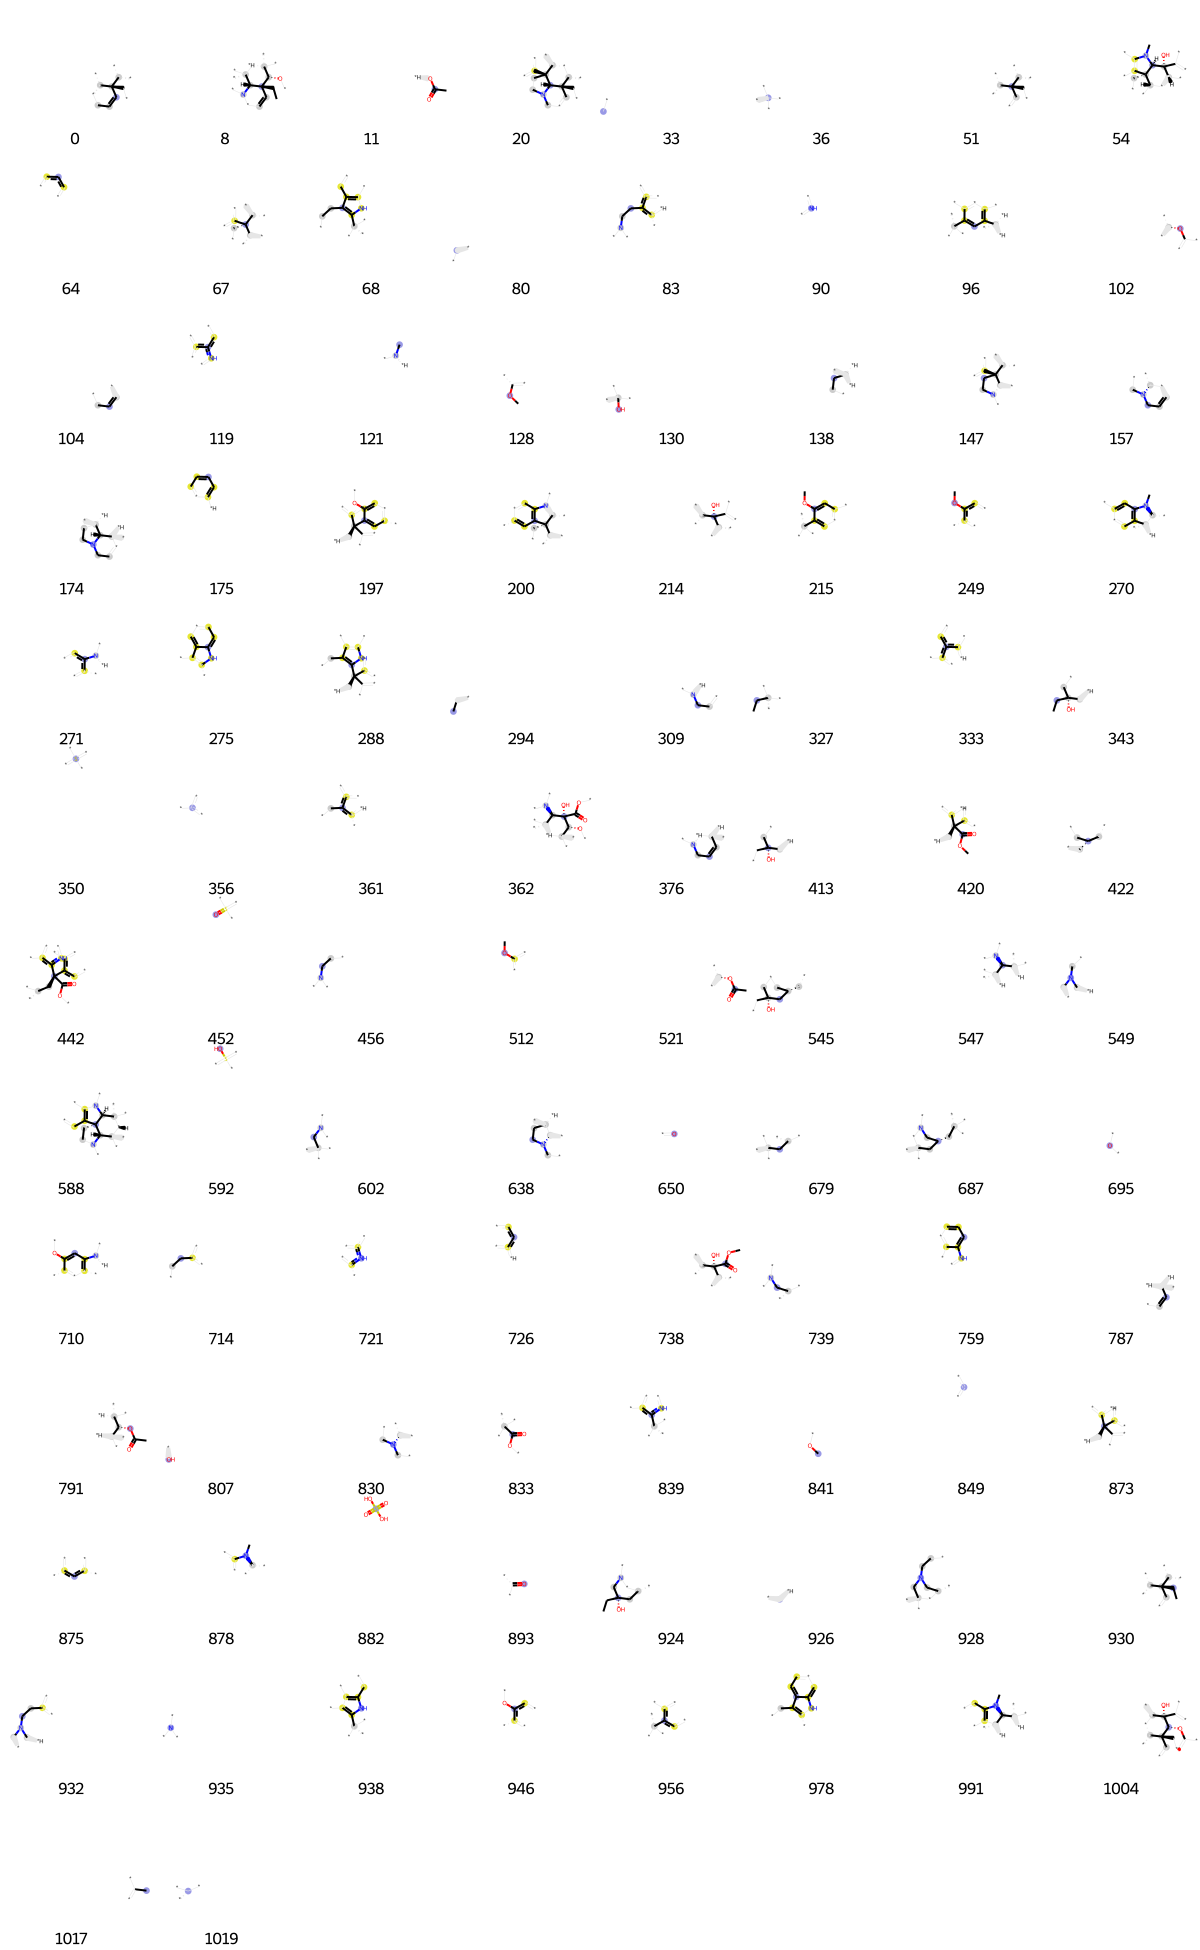

In [1138]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [1139]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 26,
 31,
 33,
 41,
 102,
 112,
 119,
 121,
 122,
 133,
 147,
 268,
 278,
 283,
 301,
 338,
 341,
 356,
 389,
 508,
 520,
 607,
 625,
 650,
 670,
 694,
 695,
 726,
 728,
 807,
 829,
 838,
 849,
 886,
 892,
 893,
 900,
 909,
 926,
 935,
 976,
 1019]

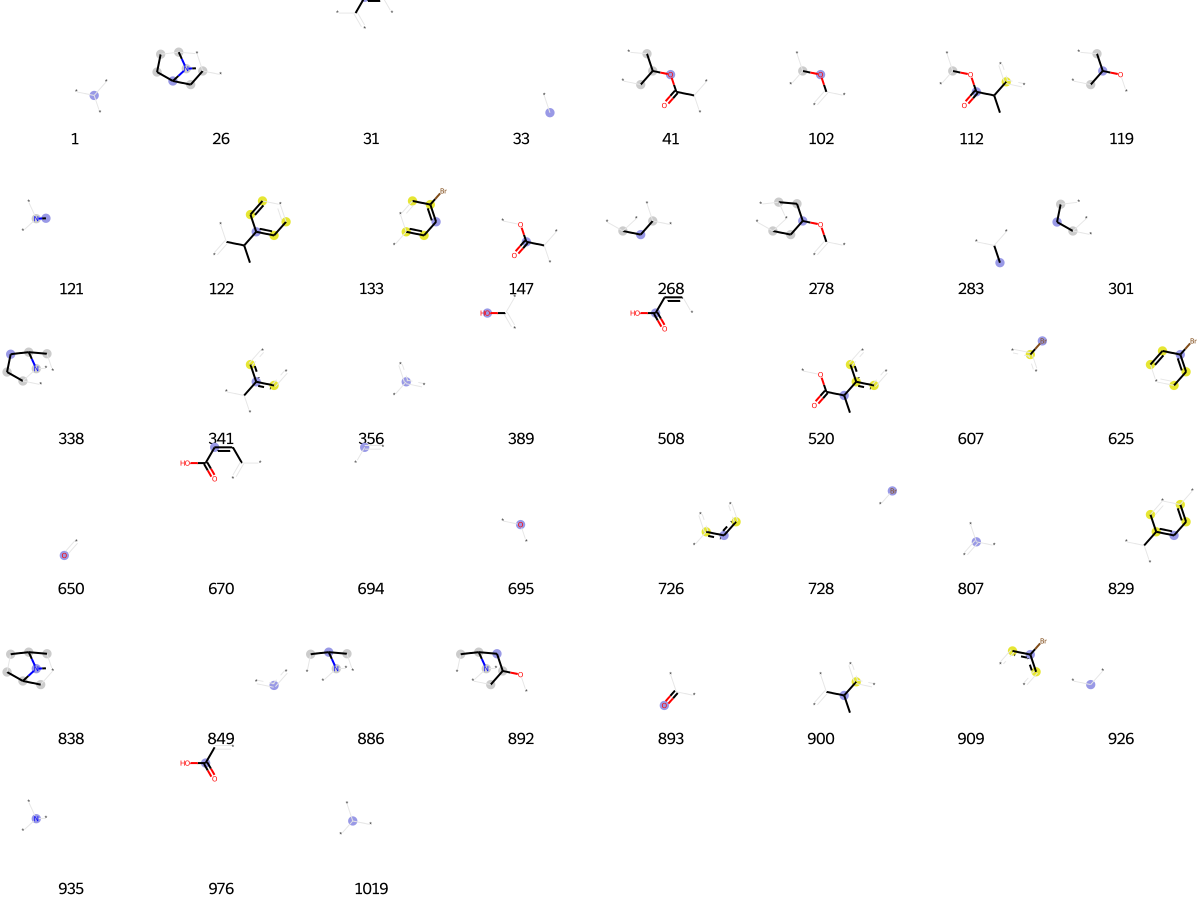

In [1140]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1141]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[12,
 15,
 29,
 35,
 36,
 80,
 130,
 138,
 150,
 212,
 214,
 231,
 248,
 264,
 267,
 270,
 301,
 311,
 327,
 342,
 356,
 389,
 451,
 453,
 456,
 474,
 514,
 556,
 574,
 578,
 583,
 632,
 647,
 649,
 656,
 682,
 714,
 726,
 736,
 737,
 750,
 784,
 807,
 849,
 889,
 908,
 926,
 935,
 956,
 986,
 998,
 1019]

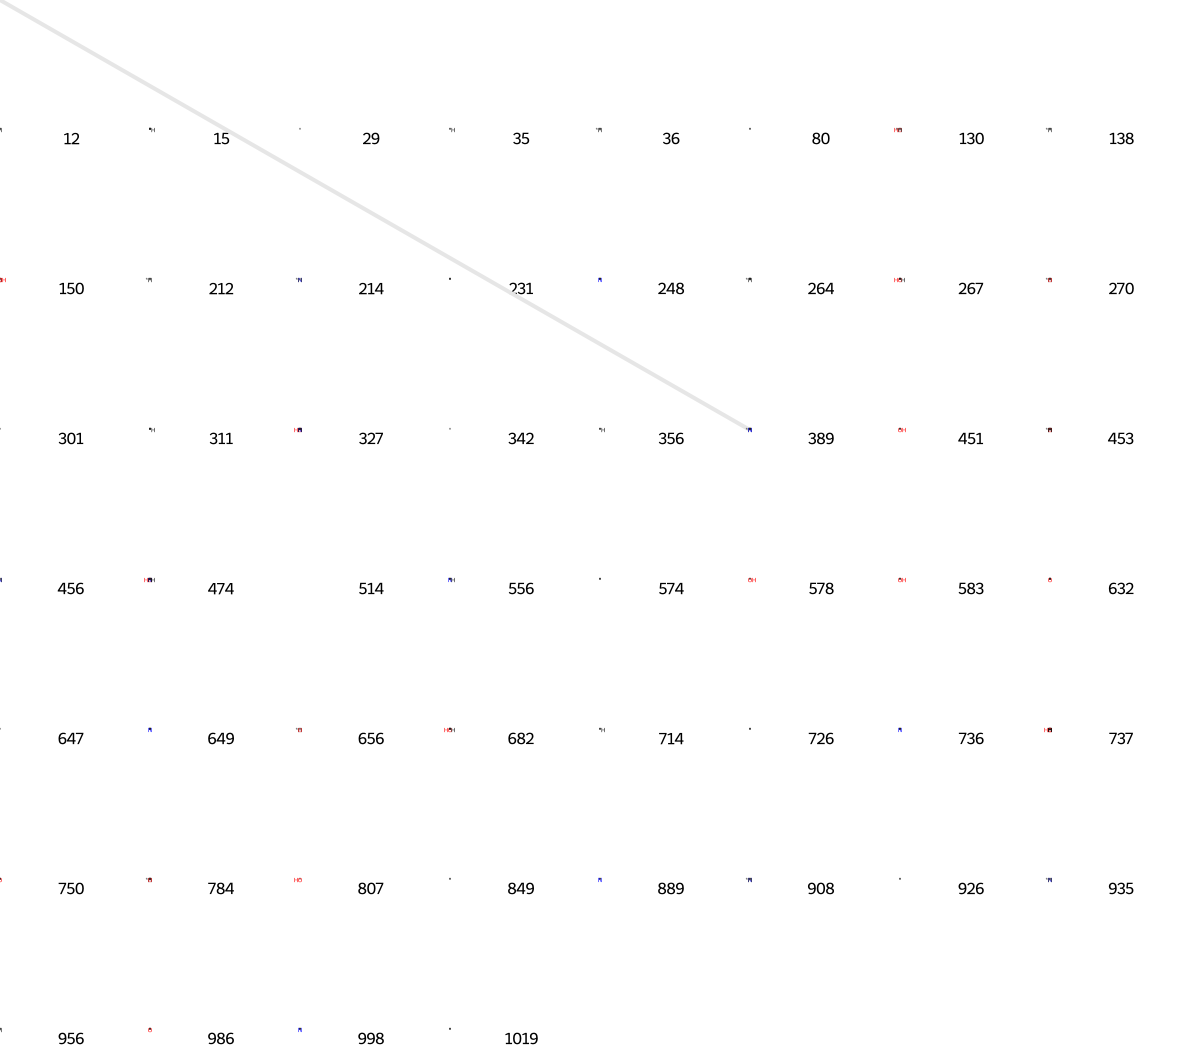

In [1142]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1143]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 20,
 80,
 192,
 263,
 368,
 389,
 486,
 540,
 570,
 605,
 650,
 713,
 739,
 782,
 807,
 814,
 820,
 853,
 893,
 910,
 936,
 955]

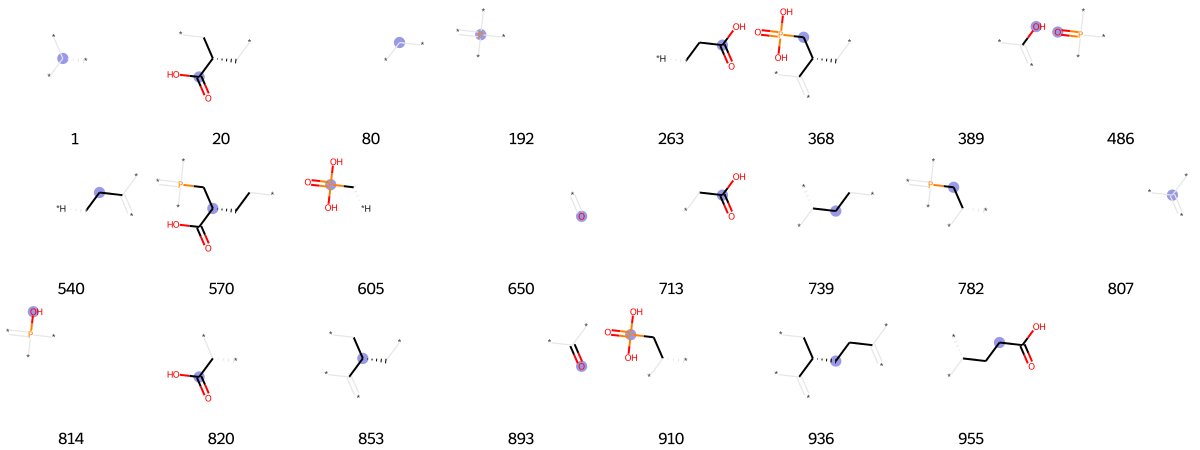

In [1144]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1145]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 21,
 33,
 80,
 104,
 128,
 193,
 219,
 283,
 289,
 310,
 315,
 356,
 451,
 483,
 507,
 514,
 573,
 578,
 583,
 589,
 667,
 726,
 730,
 732,
 739,
 745,
 754,
 782,
 807,
 849,
 875,
 994,
 1004,
 1021]

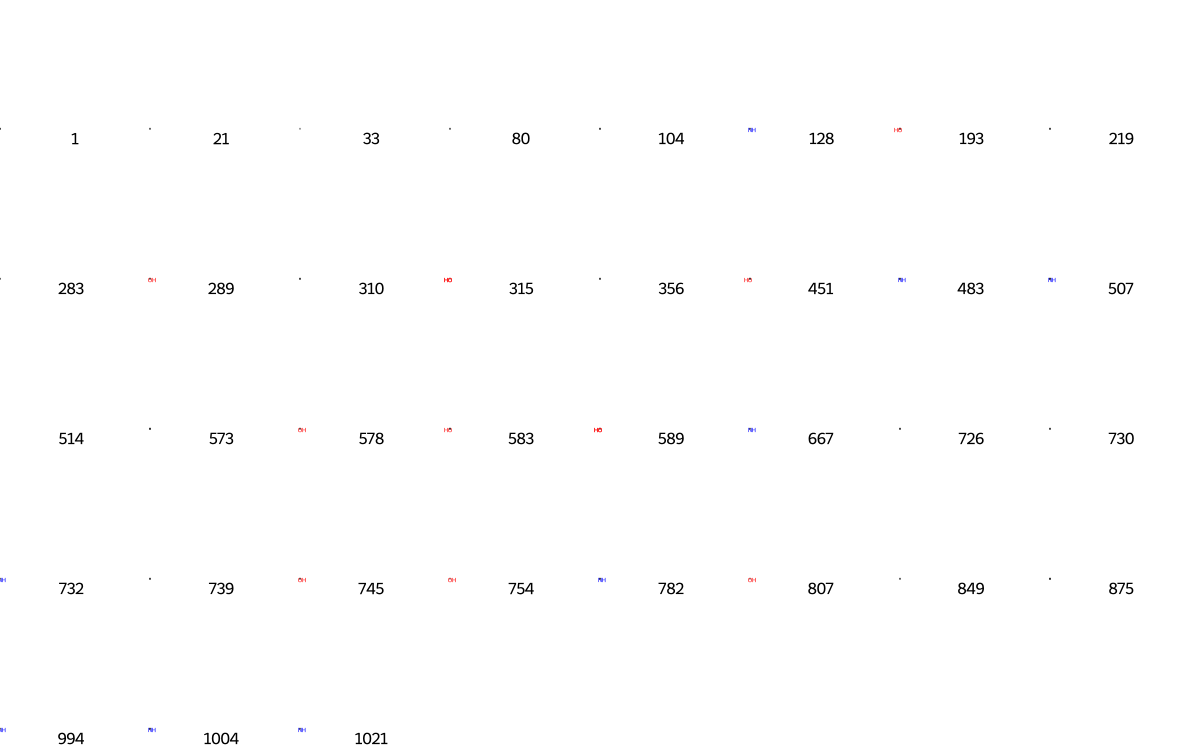

In [1146]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1147]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[8,
 10,
 13,
 33,
 64,
 80,
 91,
 102,
 104,
 128,
 139,
 154,
 175,
 197,
 240,
 247,
 322,
 333,
 356,
 361,
 368,
 390,
 428,
 486,
 490,
 507,
 549,
 580,
 606,
 607,
 641,
 650,
 652,
 656,
 667,
 673,
 692,
 695,
 718,
 726,
 740,
 766,
 784,
 807,
 849,
 853,
 878,
 881,
 893,
 898,
 1010]

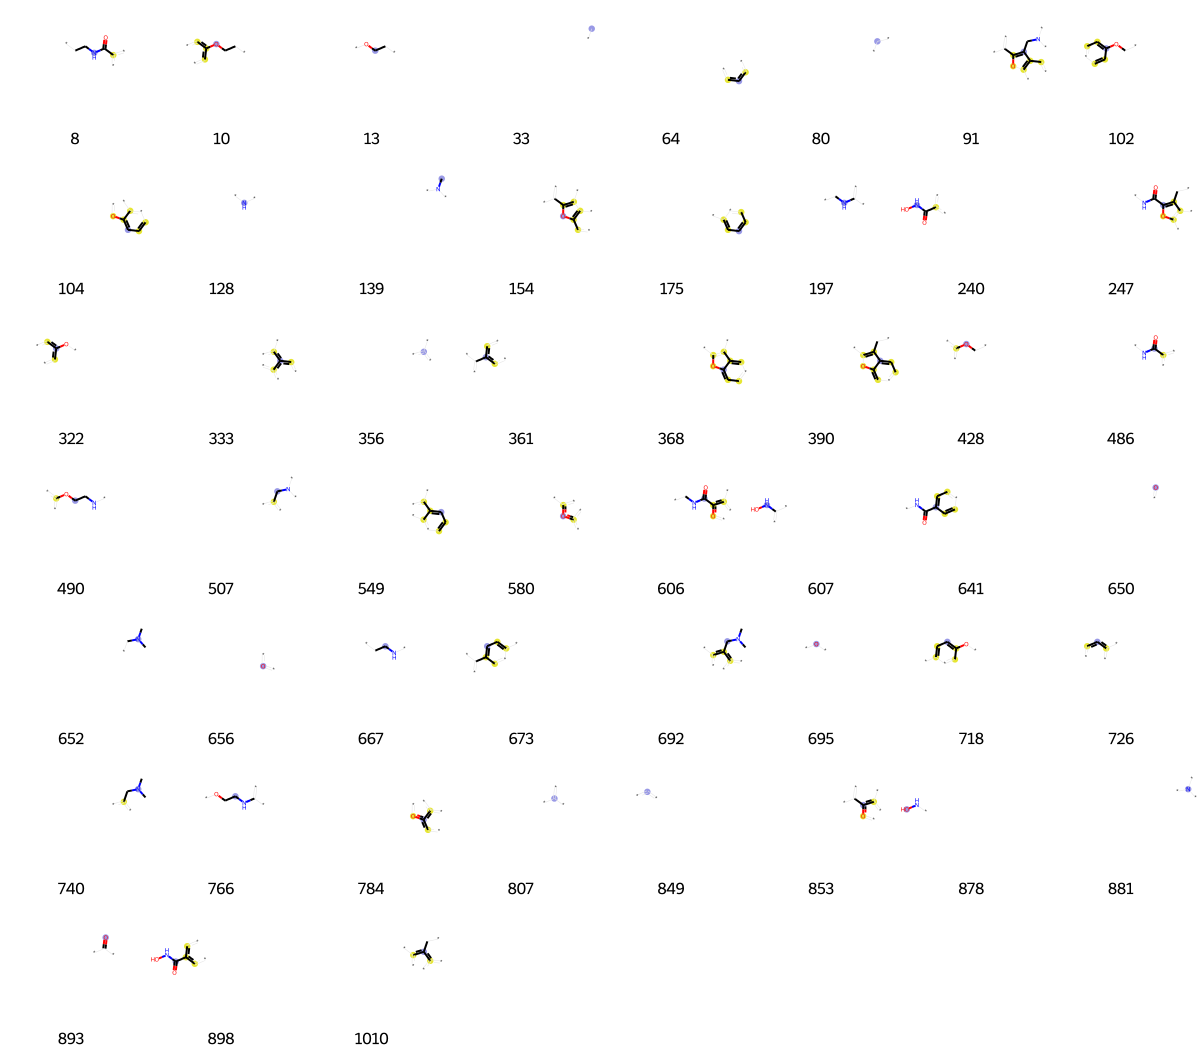

In [1148]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1149]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[3,
 4,
 15,
 33,
 89,
 90,
 128,
 130,
 246,
 282,
 301,
 305,
 313,
 350,
 356,
 361,
 367,
 378,
 381,
 409,
 451,
 452,
 473,
 489,
 503,
 539,
 578,
 583,
 585,
 650,
 654,
 686,
 692,
 714,
 721,
 726,
 807,
 836,
 842,
 849,
 869,
 881,
 918,
 926,
 934,
 968,
 1019]

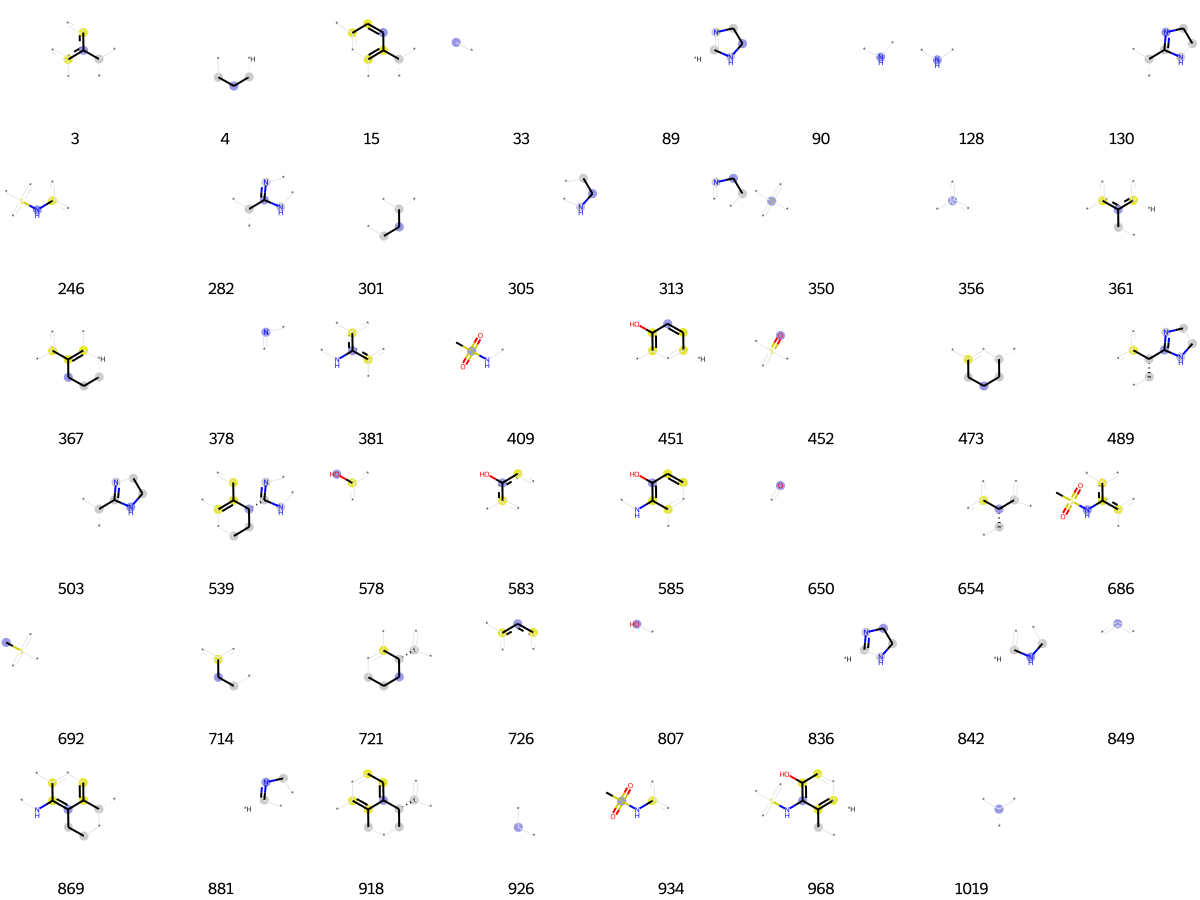

In [1150]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1151]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 15,
 33,
 64,
 79,
 116,
 119,
 162,
 171,
 245,
 279,
 354,
 356,
 366,
 377,
 419,
 522,
 543,
 552,
 555,
 561,
 649,
 650,
 659,
 665,
 675,
 715,
 716,
 726,
 745,
 753,
 796,
 807,
 838,
 849,
 875,
 893,
 939,
 958,
 974,
 1011,
 1017]

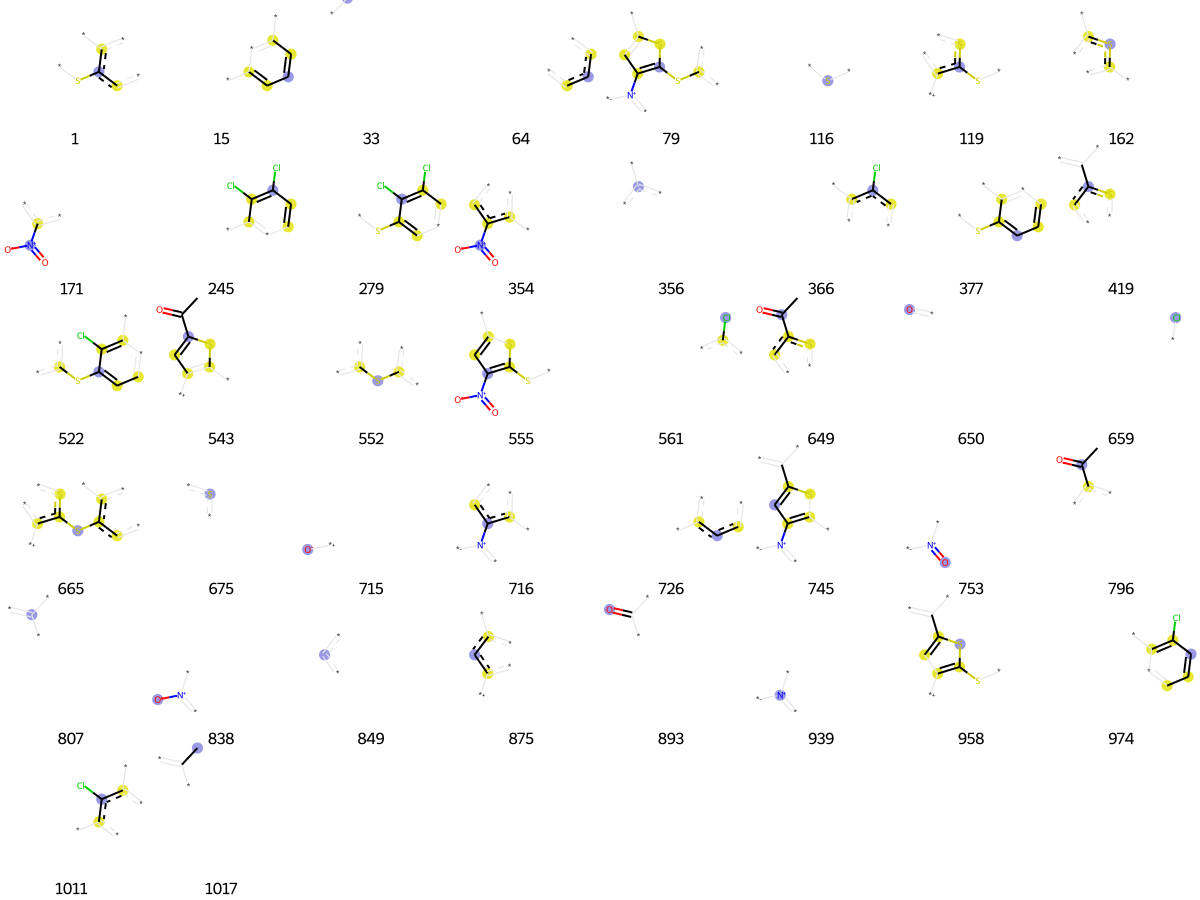

In [1152]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1153]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 33,
 79,
 80,
 122,
 233,
 283,
 310,
 341,
 356,
 389,
 650,
 726,
 730,
 807,
 820,
 823,
 829,
 849,
 854,
 857,
 893,
 900,
 921,
 955]

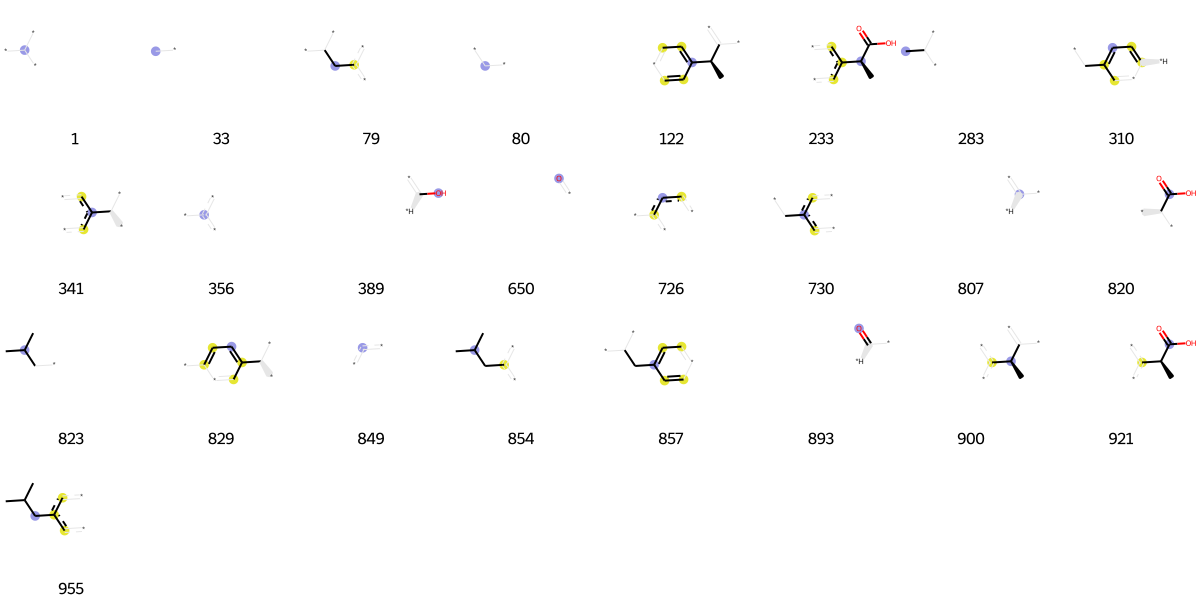

In [1154]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1155]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 4,
 33,
 50,
 102,
 116,
 117,
 128,
 179,
 184,
 189,
 283,
 356,
 378,
 380,
 383,
 428,
 430,
 486,
 489,
 511,
 579,
 650,
 659,
 669,
 674,
 695,
 726,
 807,
 842,
 849,
 855,
 871,
 893,
 930,
 1010]

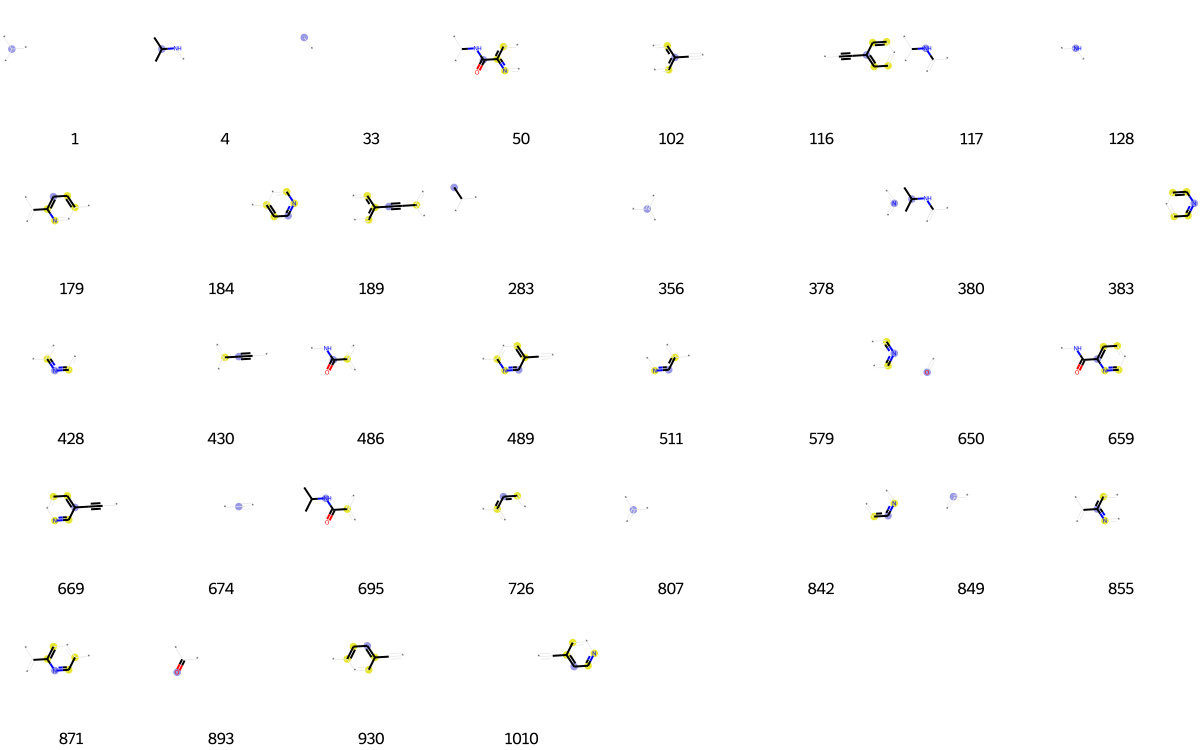

In [1156]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1157]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[33,
 80,
 128,
 138,
 202,
 253,
 257,
 262,
 414,
 540,
 628,
 650,
 667,
 696,
 715,
 735,
 785,
 807,
 893,
 958]

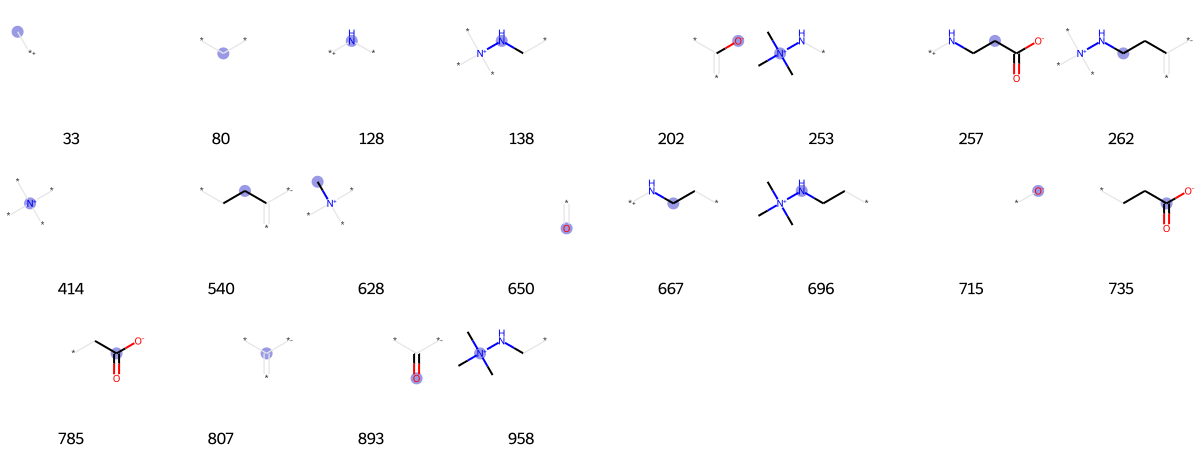

In [1158]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1159]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 33,
 80,
 117,
 128,
 164,
 220,
 222,
 227,
 252,
 293,
 318,
 319,
 341,
 350,
 356,
 375,
 449,
 452,
 470,
 482,
 539,
 573,
 643,
 650,
 659,
 692,
 715,
 726,
 807,
 824,
 829,
 849,
 886,
 893,
 914]

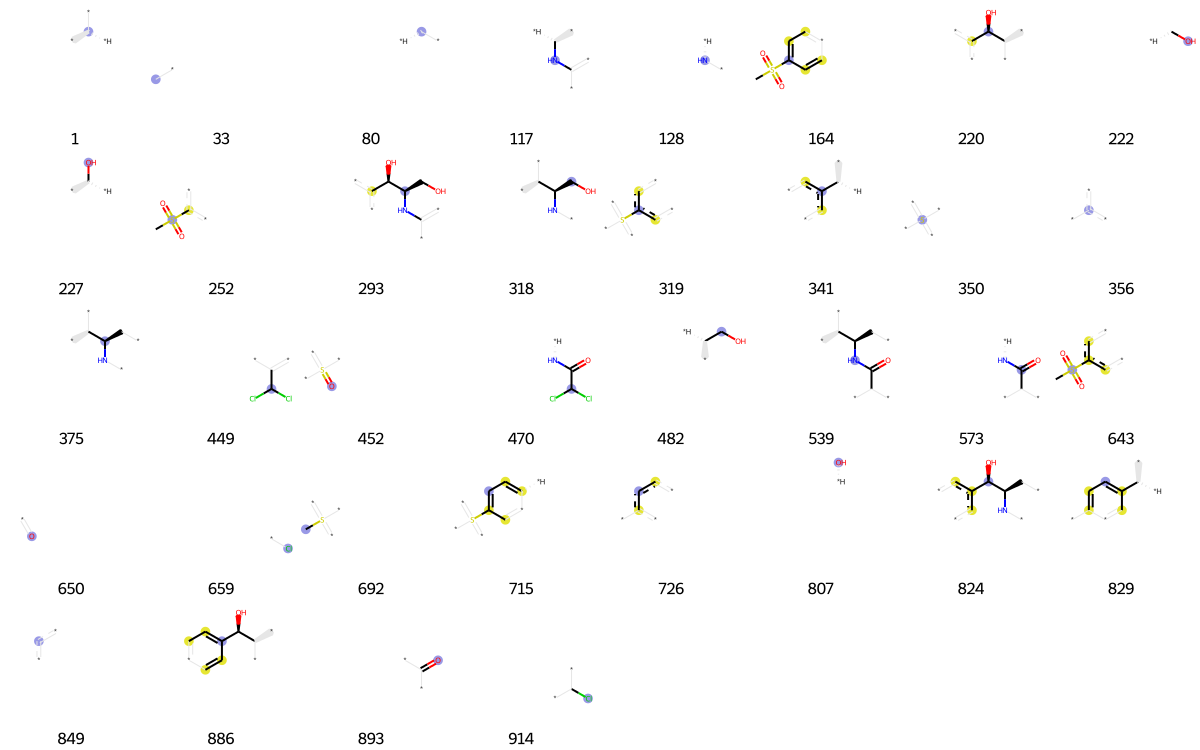

In [1160]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1161]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[15,
 33,
 36,
 64,
 73,
 80,
 111,
 130,
 164,
 171,
 212,
 233,
 245,
 248,
 268,
 289,
 294,
 314,
 323,
 327,
 333,
 354,
 356,
 361,
 369,
 378,
 389,
 392,
 402,
 441,
 472,
 477,
 497,
 504,
 541,
 609,
 628,
 646,
 650,
 656,
 657,
 668,
 706,
 715,
 716,
 726,
 753,
 762,
 794,
 807,
 831,
 838,
 849,
 856,
 875,
 922,
 926,
 935,
 939,
 956,
 1011]

In [1162]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 4,
 8,
 13,
 33,
 35,
 36,
 56,
 80,
 98,
 114,
 118,
 133,
 137,
 138,
 206,
 217,
 219,
 228,
 231,
 233,
 243,
 250,
 268,
 283,
 284,
 301,
 316,
 321,
 336,
 342,
 344,
 356,
 395,
 444,
 453,
 472,
 478,
 546,
 549,
 590,
 619,
 632,
 678,
 681,
 694,
 695,
 712,
 714,
 798,
 807,
 838,
 860,
 884,
 890,
 921,
 926,
 952,
 996,
 1012,
 1019]

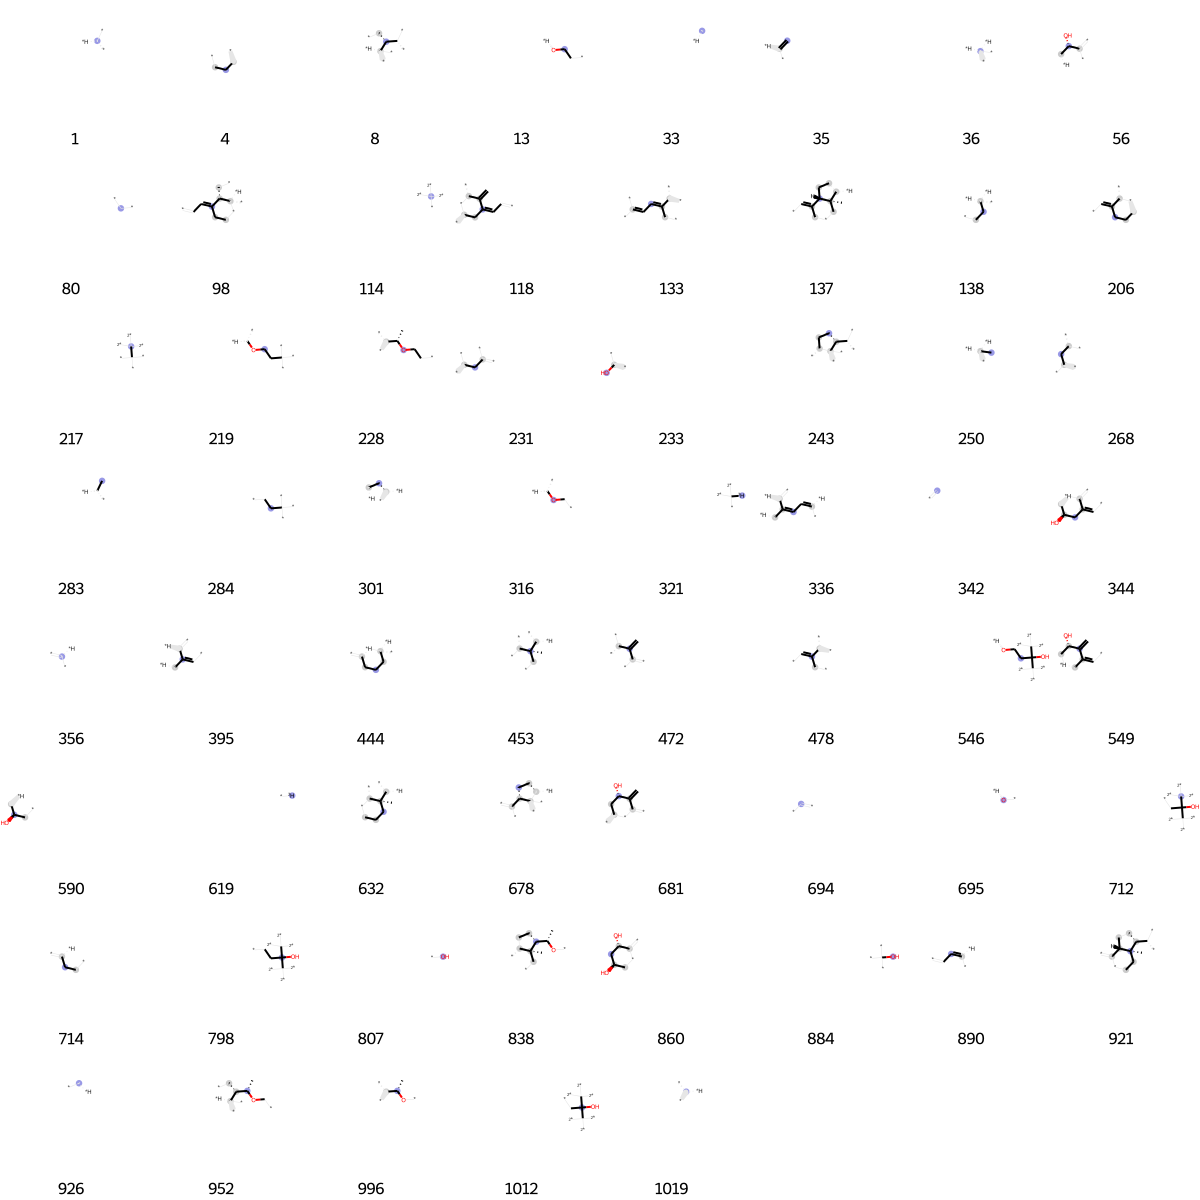

In [1163]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1164]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[15,
 31,
 33,
 38,
 64,
 74,
 80,
 112,
 128,
 175,
 197,
 229,
 231,
 265,
 271,
 288,
 356,
 360,
 361,
 389,
 407,
 456,
 484,
 486,
 508,
 526,
 620,
 623,
 650,
 670,
 674,
 694,
 698,
 726,
 767,
 780,
 790,
 799,
 807,
 837,
 838,
 849,
 875,
 893,
 926,
 935,
 961,
 976,
 981,
 1013]

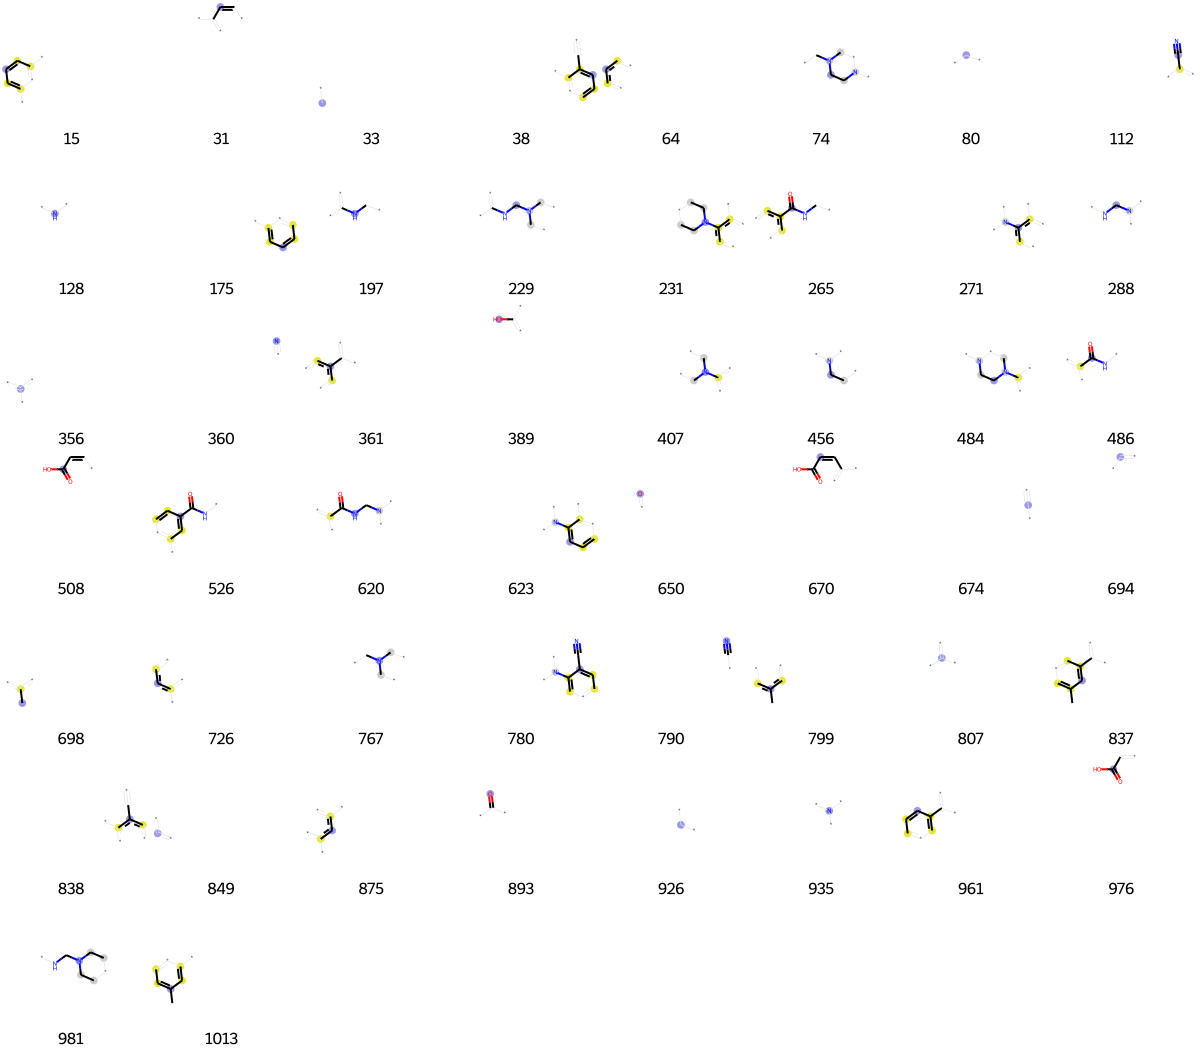

In [1165]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1166]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[4,
 9,
 33,
 65,
 114,
 128,
 165,
 200,
 216,
 246,
 290,
 297,
 315,
 319,
 350,
 352,
 356,
 361,
 392,
 393,
 406,
 452,
 463,
 502,
 532,
 561,
 573,
 641,
 646,
 650,
 659,
 715,
 726,
 751,
 766,
 791,
 807,
 816,
 832,
 849,
 863,
 875,
 883,
 893,
 967,
 1003]

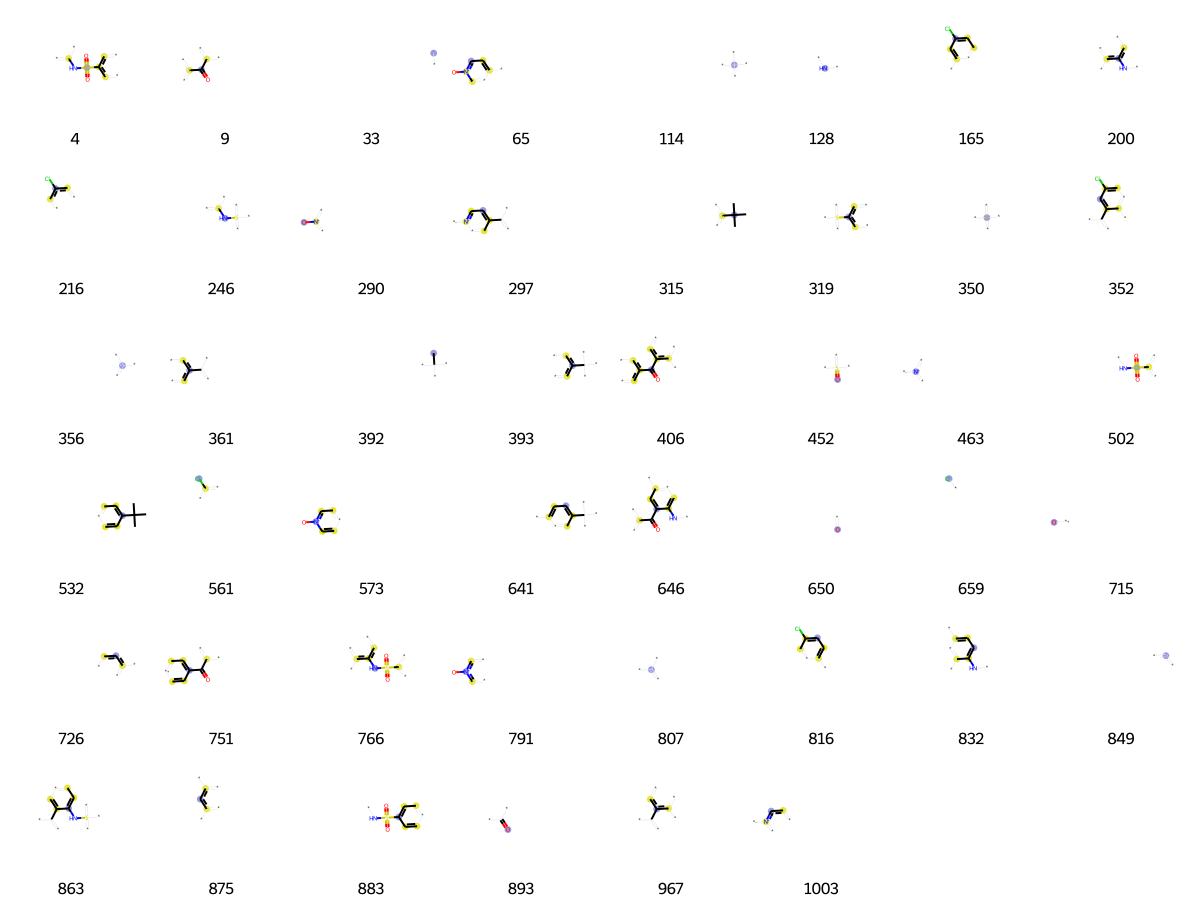

In [1167]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1168]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 14,
 33,
 64,
 73,
 79,
 90,
 119,
 128,
 175,
 200,
 230,
 241,
 270,
 274,
 283,
 289,
 314,
 323,
 328,
 341,
 343,
 352,
 356,
 378,
 383,
 419,
 486,
 535,
 543,
 598,
 650,
 661,
 667,
 675,
 706,
 721,
 722,
 726,
 750,
 759,
 780,
 792,
 807,
 829,
 830,
 831,
 832,
 849,
 875,
 893,
 906,
 915,
 947]

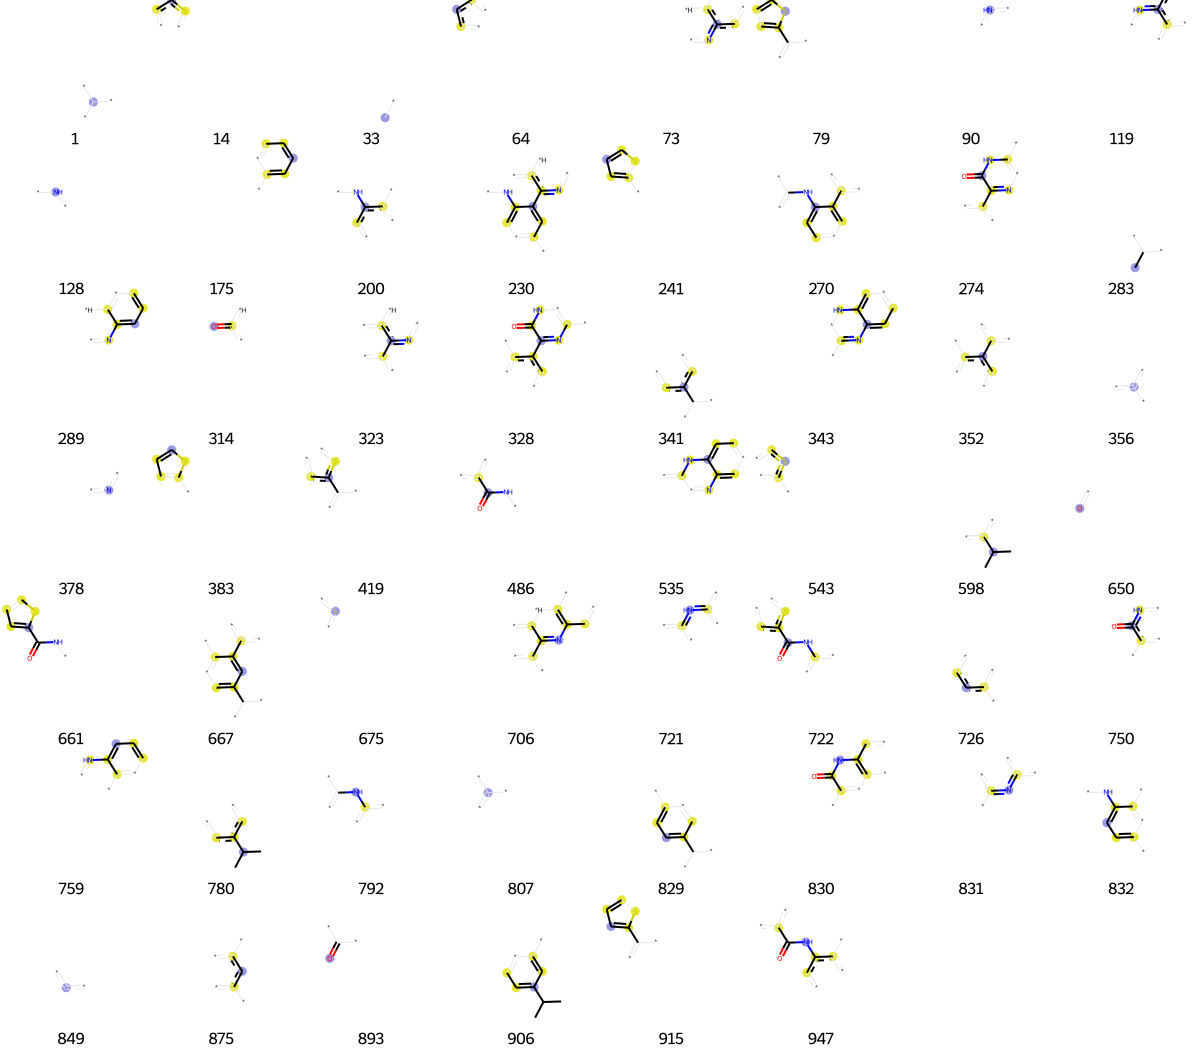

In [1169]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1170]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[0,
 10,
 13,
 33,
 46,
 80,
 102,
 136,
 139,
 193,
 216,
 219,
 228,
 233,
 236,
 251,
 294,
 318,
 322,
 356,
 378,
 420,
 428,
 464,
 510,
 557,
 559,
 561,
 564,
 591,
 593,
 620,
 659,
 695,
 705,
 718,
 726,
 794,
 801,
 816,
 831,
 849,
 881,
 887,
 895,
 896,
 927,
 932,
 935,
 947,
 957,
 975,
 980]

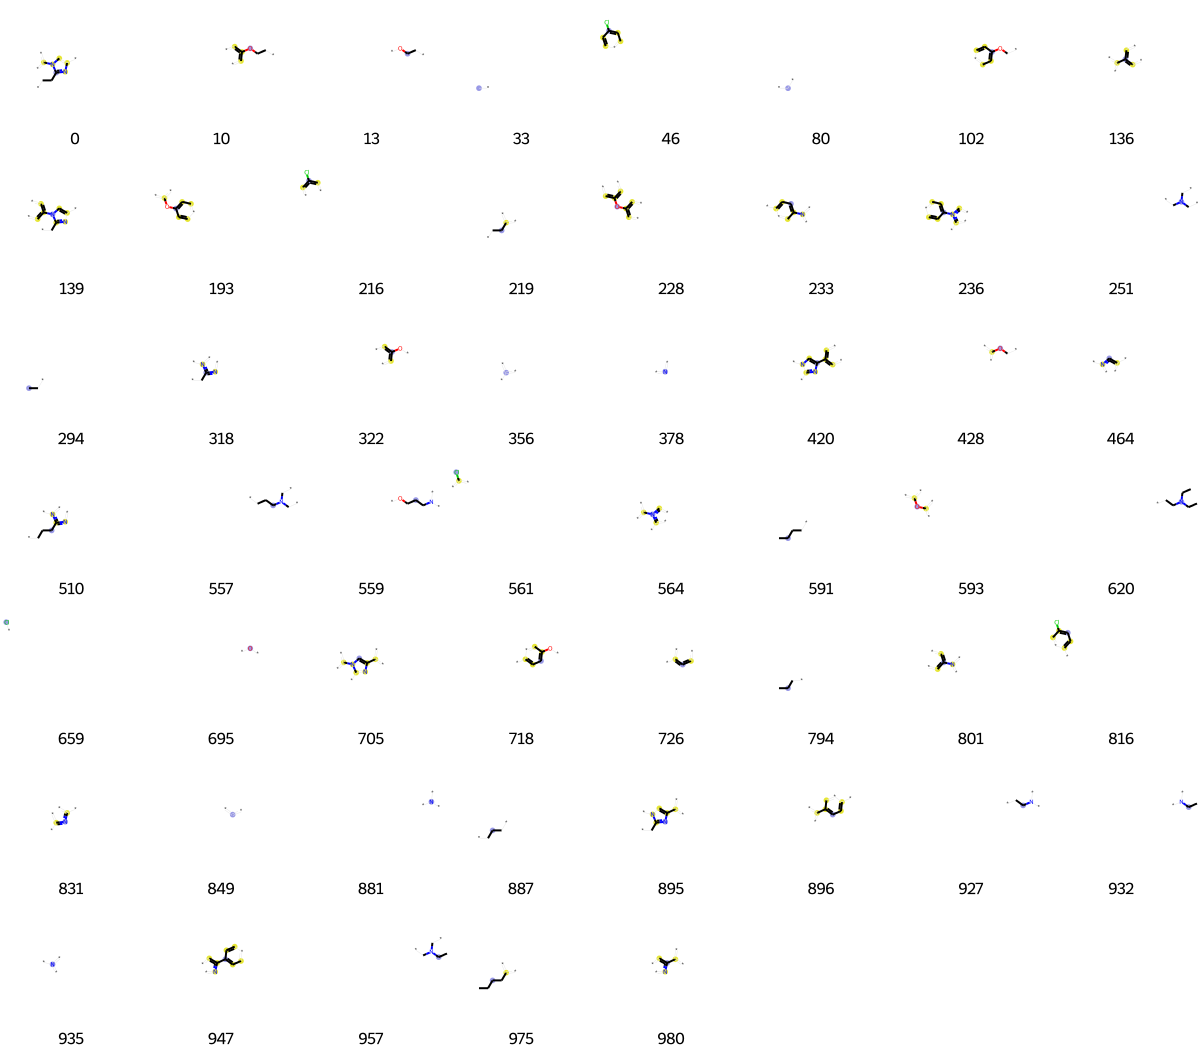

In [1171]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1172]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[0,
 4,
 15,
 25,
 43,
 64,
 89,
 110,
 128,
 138,
 140,
 147,
 167,
 191,
 226,
 301,
 309,
 329,
 342,
 356,
 378,
 379,
 428,
 438,
 459,
 491,
 511,
 544,
 558,
 565,
 595,
 629,
 647,
 650,
 703,
 708,
 726,
 786,
 801,
 807,
 808,
 831,
 842,
 849,
 875,
 879,
 888,
 890,
 893,
 908,
 926,
 935,
 940,
 967,
 1012,
 1015,
 1019]

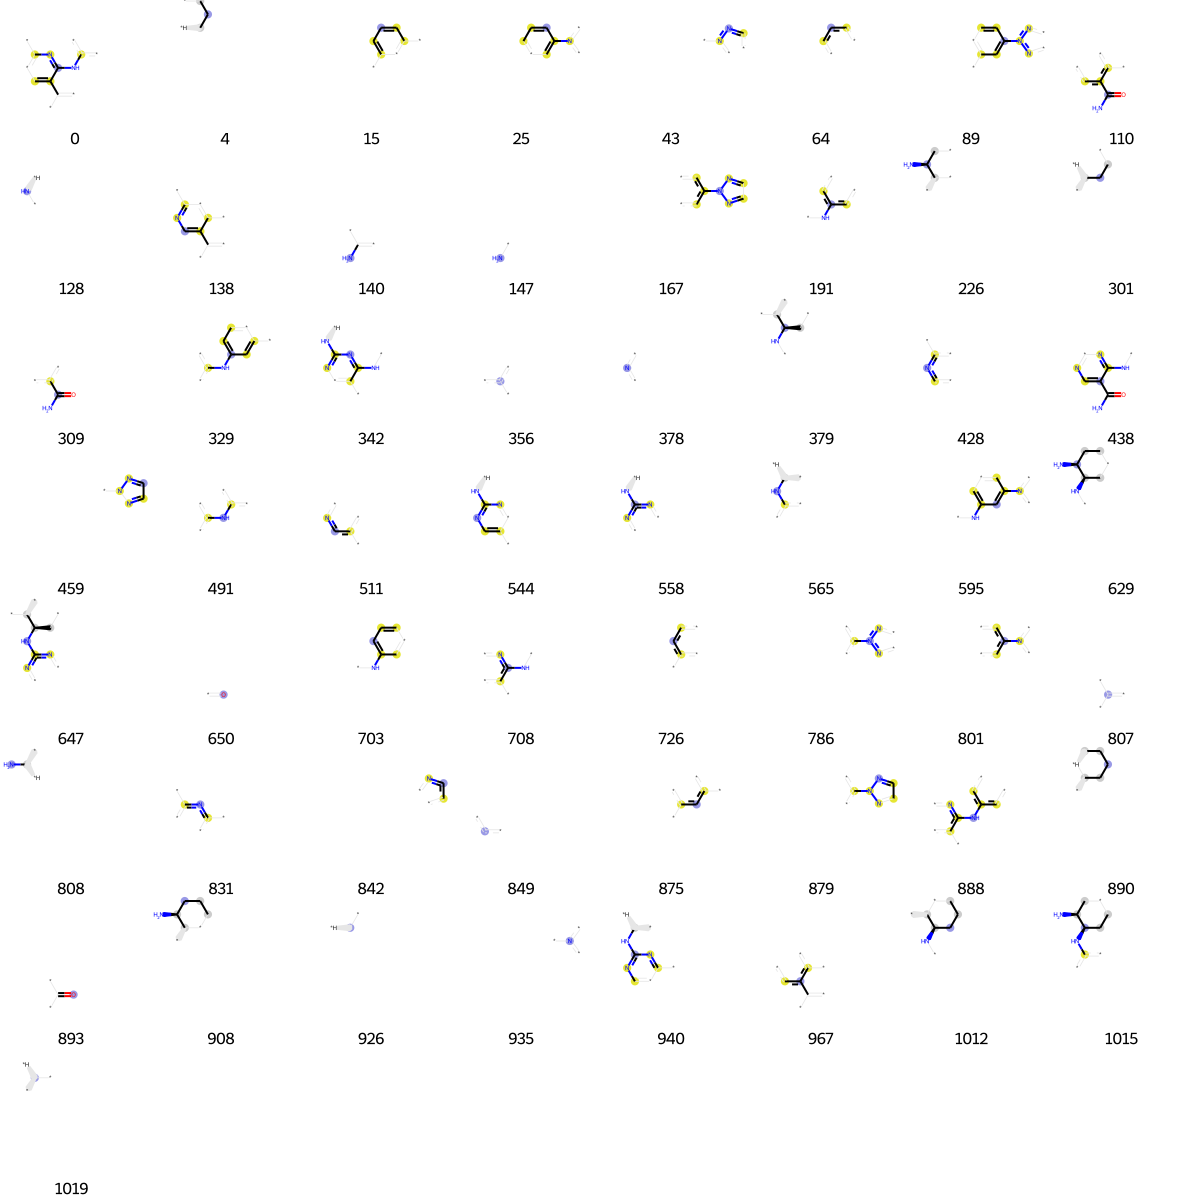

In [1173]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1174]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 4,
 14,
 18,
 33,
 41,
 42,
 58,
 64,
 79,
 80,
 86,
 108,
 117,
 128,
 139,
 140,
 143,
 147,
 166,
 175,
 183,
 188,
 193,
 197,
 242,
 259,
 283,
 301,
 334,
 350,
 354,
 356,
 360,
 369,
 382,
 389,
 409,
 412,
 427,
 433,
 446,
 452,
 456,
 458,
 460,
 481,
 488,
 493,
 531,
 540,
 545,
 573,
 592,
 594,
 613,
 618,
 623,
 624,
 650,
 667,
 680,
 689,
 692,
 708,
 726,
 728,
 730,
 736,
 739,
 759,
 763,
 786,
 794,
 807,
 816,
 823,
 825,
 831,
 837,
 849,
 852,
 857,
 874,
 875,
 881,
 887,
 893,
 894,
 926,
 927,
 935,
 981,
 982,
 983,
 992,
 1007,
 1019]

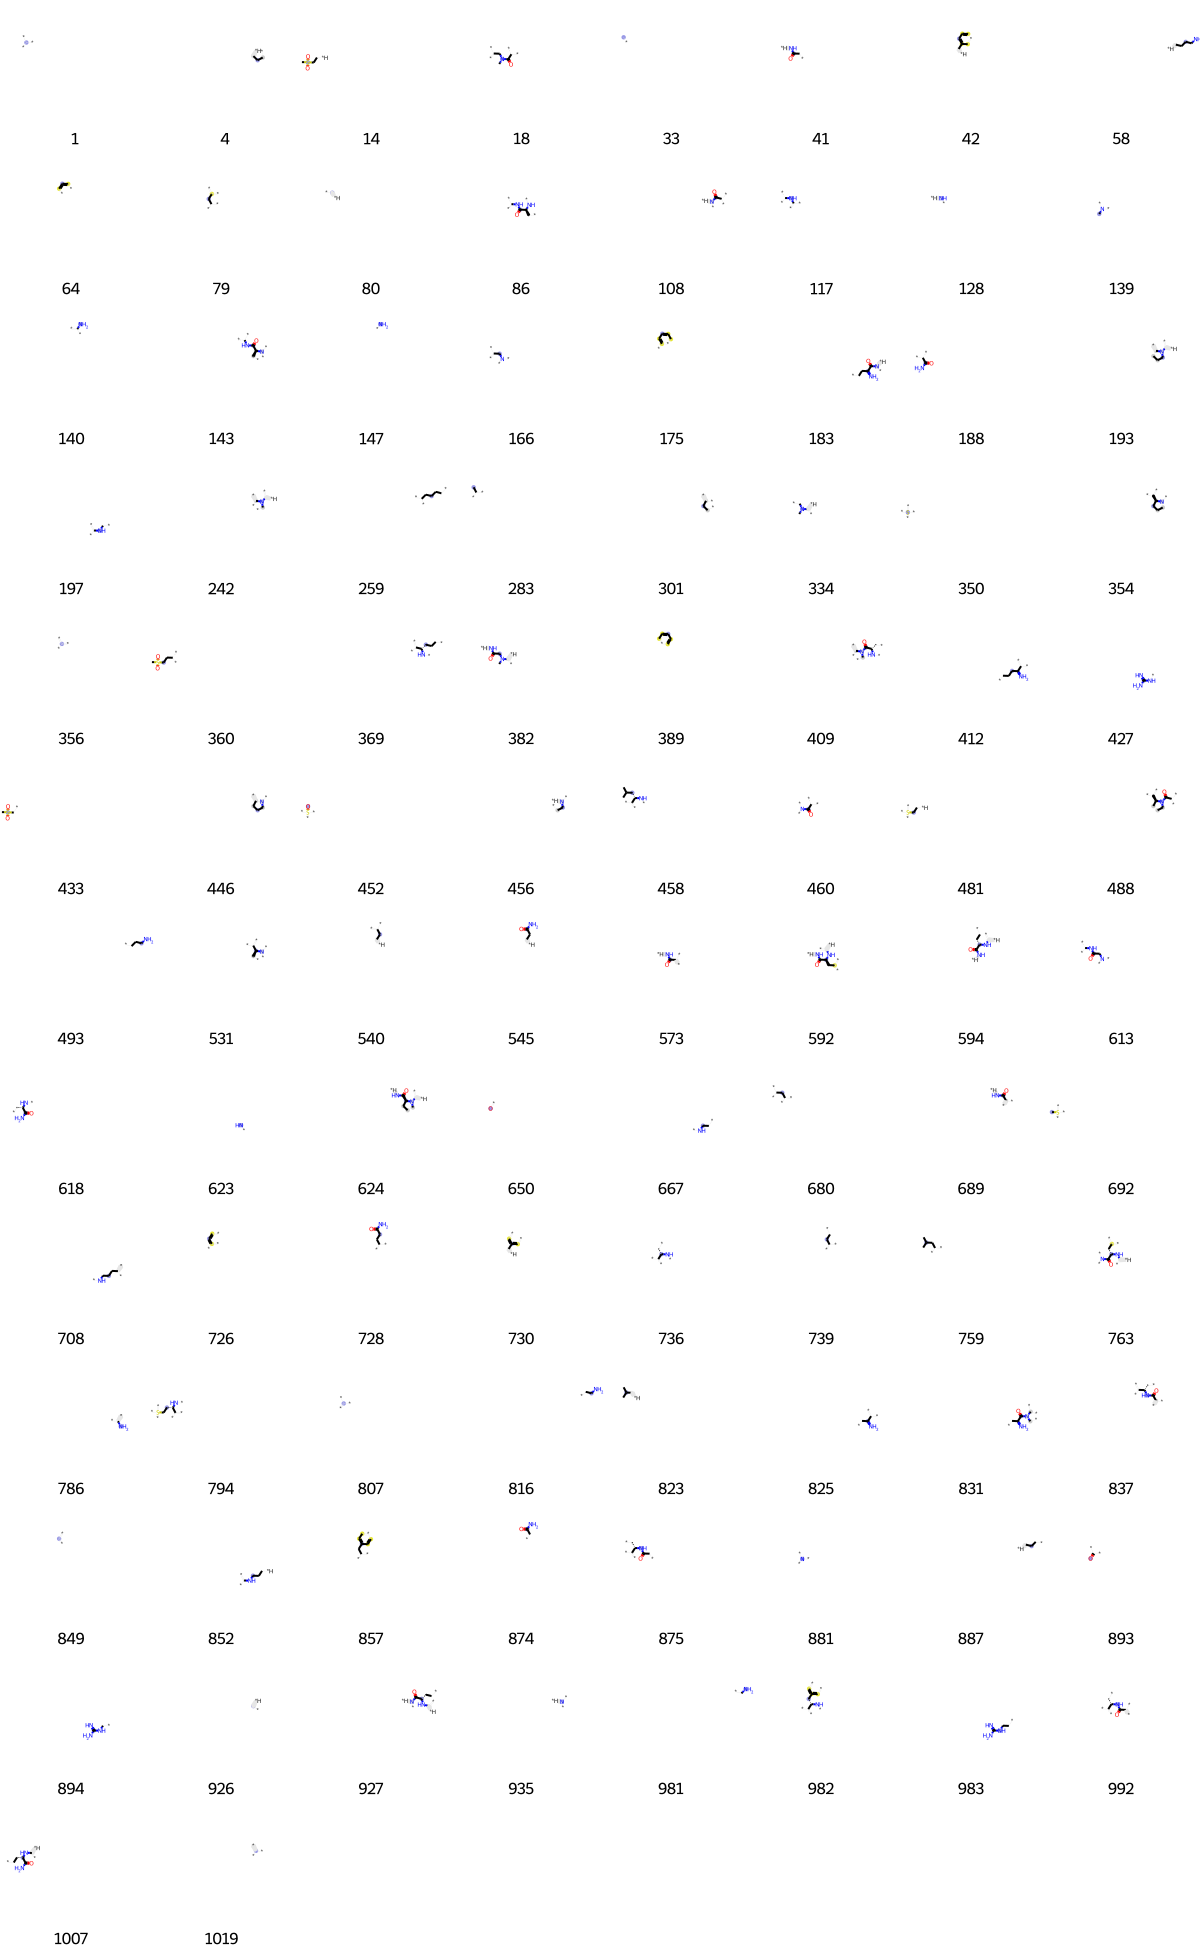

In [1175]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1176]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[33,
 64,
 73,
 74,
 80,
 87,
 90,
 114,
 136,
 140,
 161,
 175,
 186,
 194,
 219,
 222,
 227,
 235,
 237,
 293,
 294,
 310,
 318,
 335,
 352,
 356,
 378,
 389,
 392,
 423,
 456,
 561,
 585,
 629,
 641,
 650,
 659,
 702,
 726,
 730,
 741,
 752,
 794,
 802,
 807,
 818,
 831,
 841,
 849,
 861,
 873,
 884,
 893,
 896,
 922,
 929,
 935,
 984]

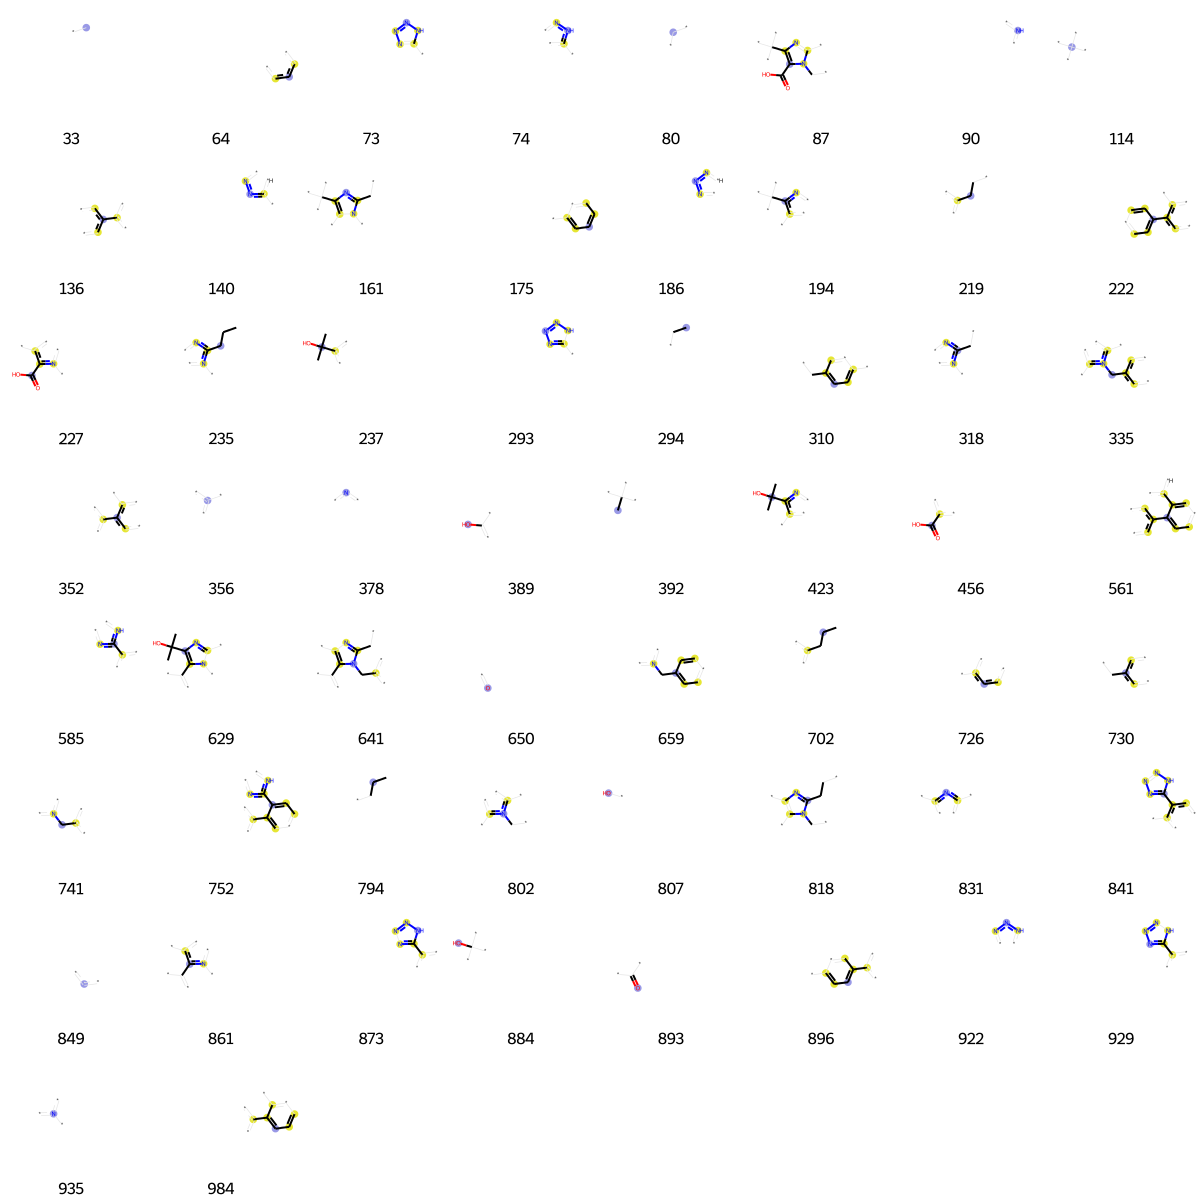

In [1177]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1178]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[8,
 21,
 23,
 29,
 33,
 80,
 142,
 226,
 231,
 236,
 285,
 294,
 314,
 320,
 354,
 356,
 378,
 430,
 441,
 458,
 481,
 496,
 529,
 590,
 650,
 656,
 666,
 715,
 717,
 753,
 838,
 849,
 861,
 880,
 899,
 911,
 926,
 939,
 941,
 1018,
 1019]

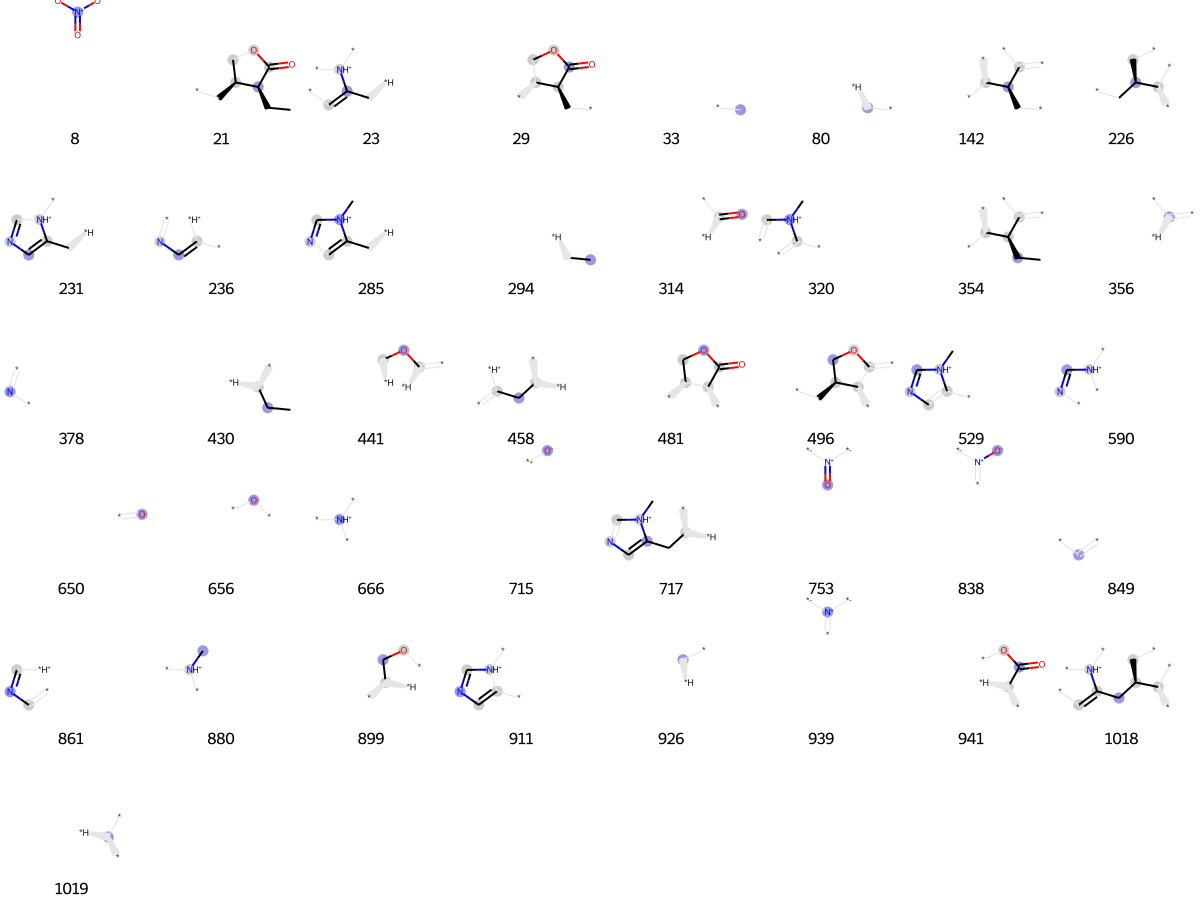

In [1179]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1180]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[33,
 80,
 128,
 197,
 235,
 294,
 307,
 319,
 331,
 350,
 356,
 425,
 452,
 454,
 502,
 582,
 591,
 650,
 667,
 698,
 715,
 726,
 794,
 799,
 807,
 849,
 852,
 883,
 887,
 893,
 895,
 896,
 965]

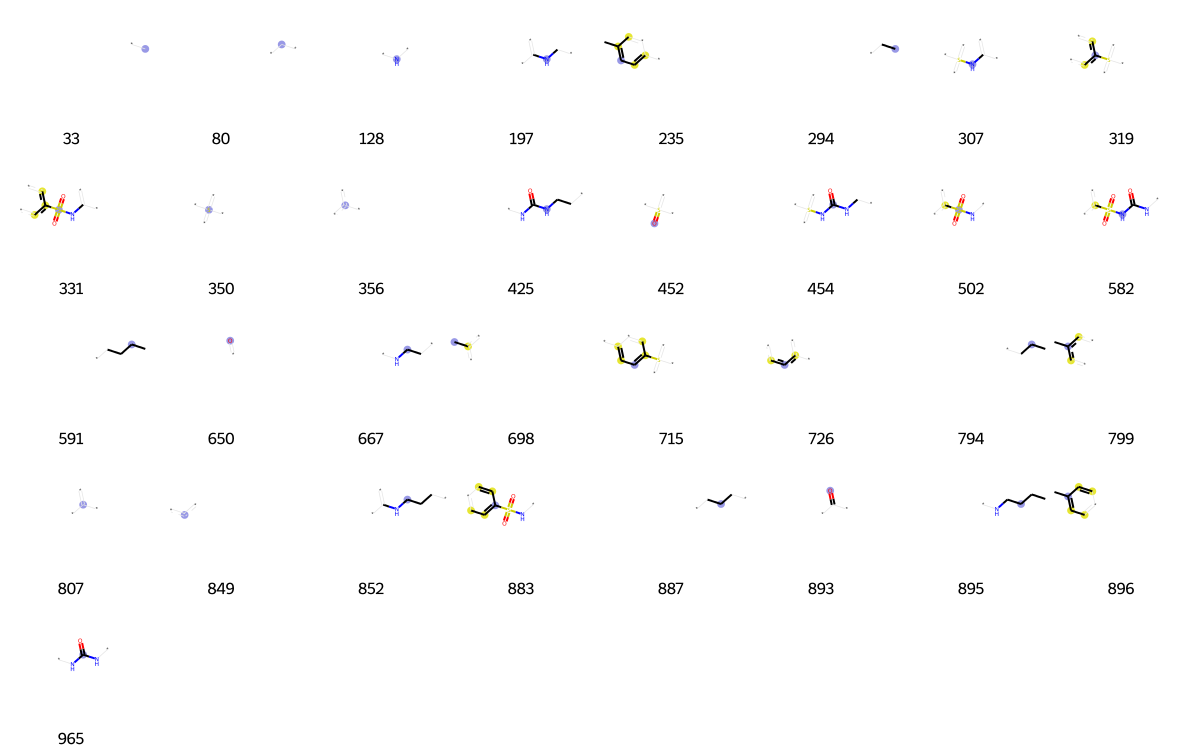

In [1181]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1182]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[22,
 74,
 128,
 133,
 191,
 268,
 272,
 356,
 422,
 424,
 544,
 565,
 585,
 590,
 607,
 625,
 726,
 728,
 829,
 843,
 849,
 909,
 926,
 952,
 1019]

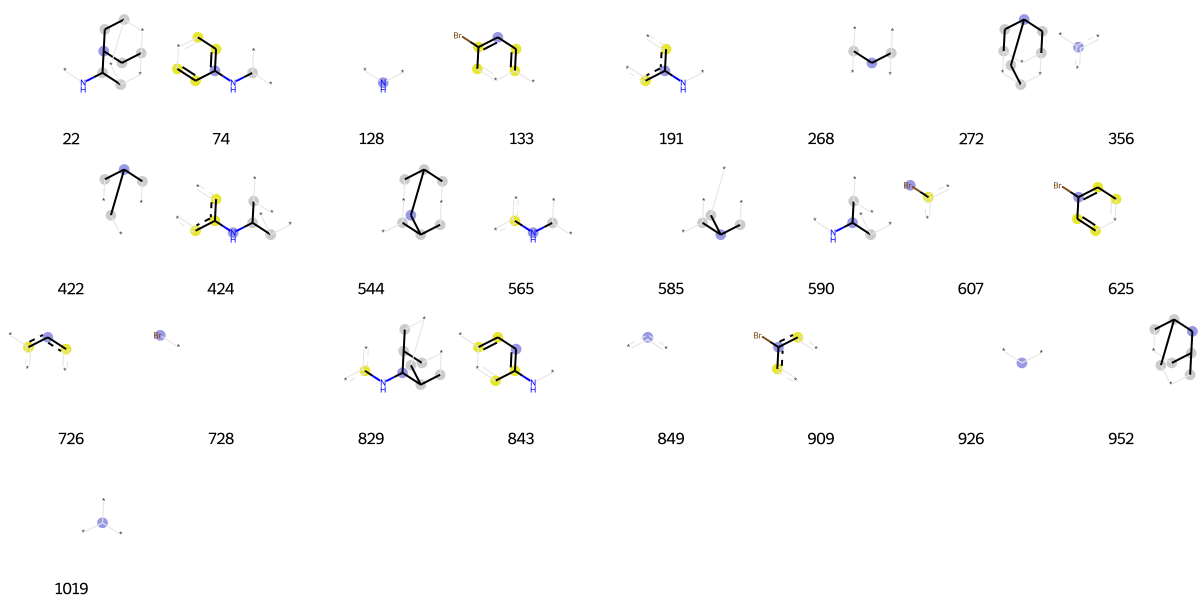

In [1183]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1184]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[4,
 23,
 33,
 61,
 75,
 128,
 140,
 187,
 202,
 246,
 319,
 350,
 352,
 354,
 356,
 378,
 389,
 451,
 452,
 456,
 494,
 502,
 512,
 530,
 546,
 559,
 569,
 578,
 583,
 650,
 651,
 656,
 674,
 695,
 715,
 725,
 726,
 807,
 830,
 841,
 849,
 875,
 883,
 893,
 931,
 967,
 997]

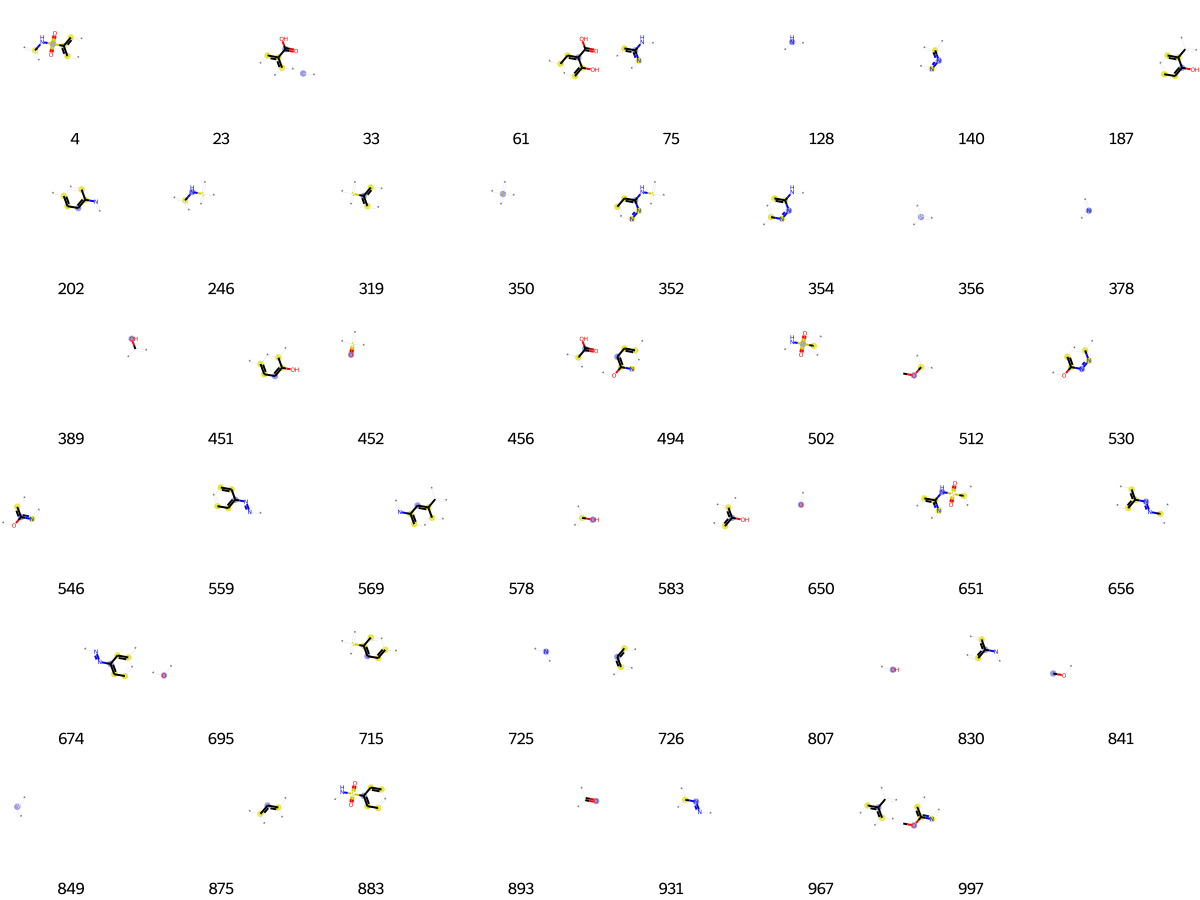

In [1185]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1186]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[0,
 1,
 33,
 36,
 41,
 80,
 92,
 111,
 117,
 128,
 165,
 166,
 180,
 192,
 197,
 216,
 274,
 283,
 293,
 314,
 352,
 356,
 366,
 377,
 379,
 389,
 416,
 486,
 524,
 561,
 564,
 625,
 646,
 650,
 656,
 659,
 666,
 680,
 690,
 691,
 708,
 713,
 726,
 759,
 807,
 816,
 823,
 830,
 838,
 849,
 875,
 893,
 901,
 905,
 967,
 1004]

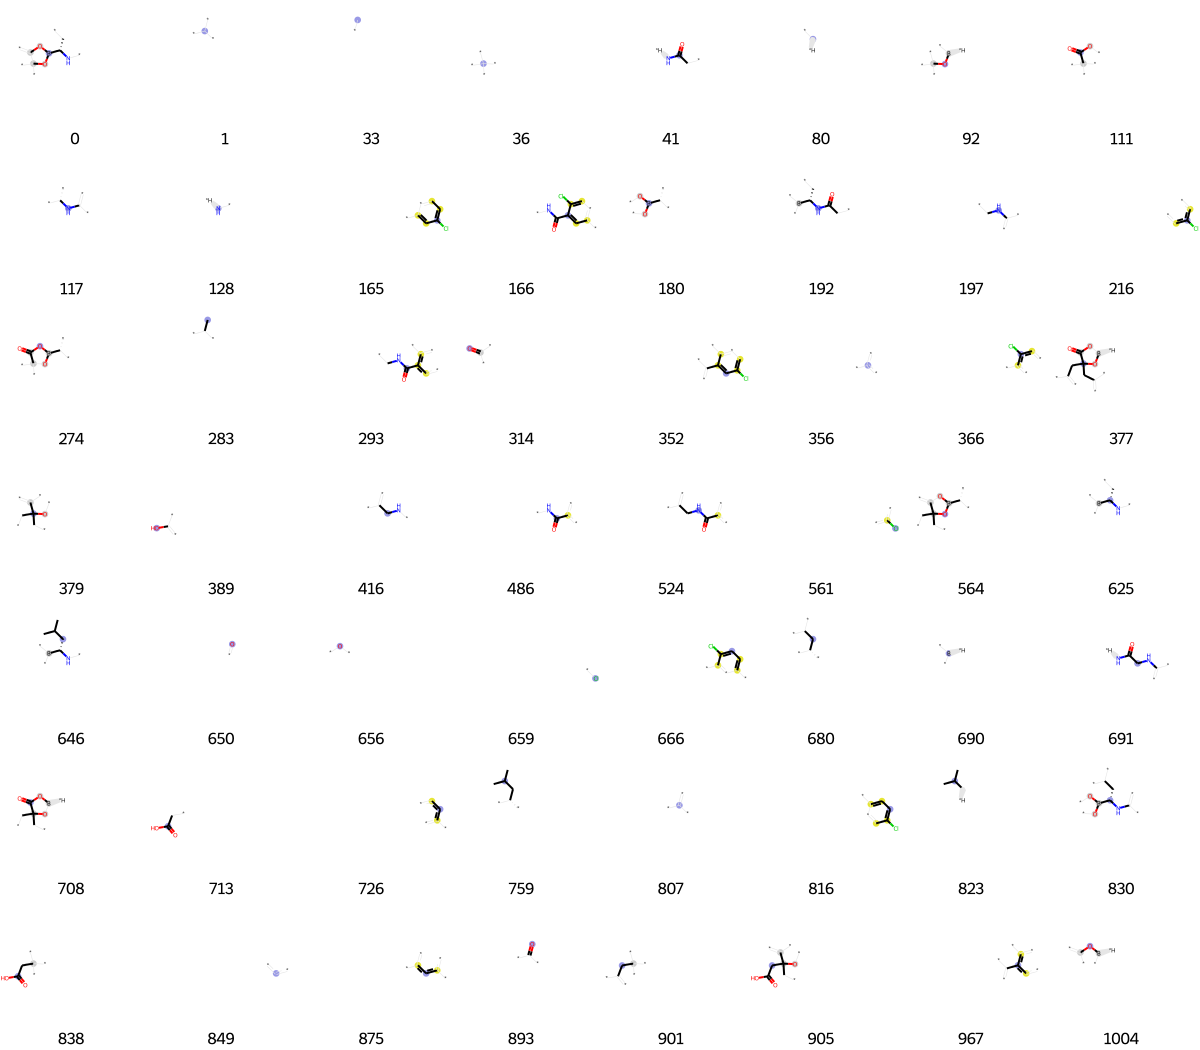

In [1187]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1188]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[4,
 33,
 80,
 128,
 144,
 147,
 227,
 246,
 285,
 319,
 322,
 350,
 356,
 378,
 428,
 433,
 452,
 502,
 511,
 512,
 544,
 558,
 650,
 695,
 715,
 726,
 780,
 781,
 784,
 841,
 849,
 883,
 888]

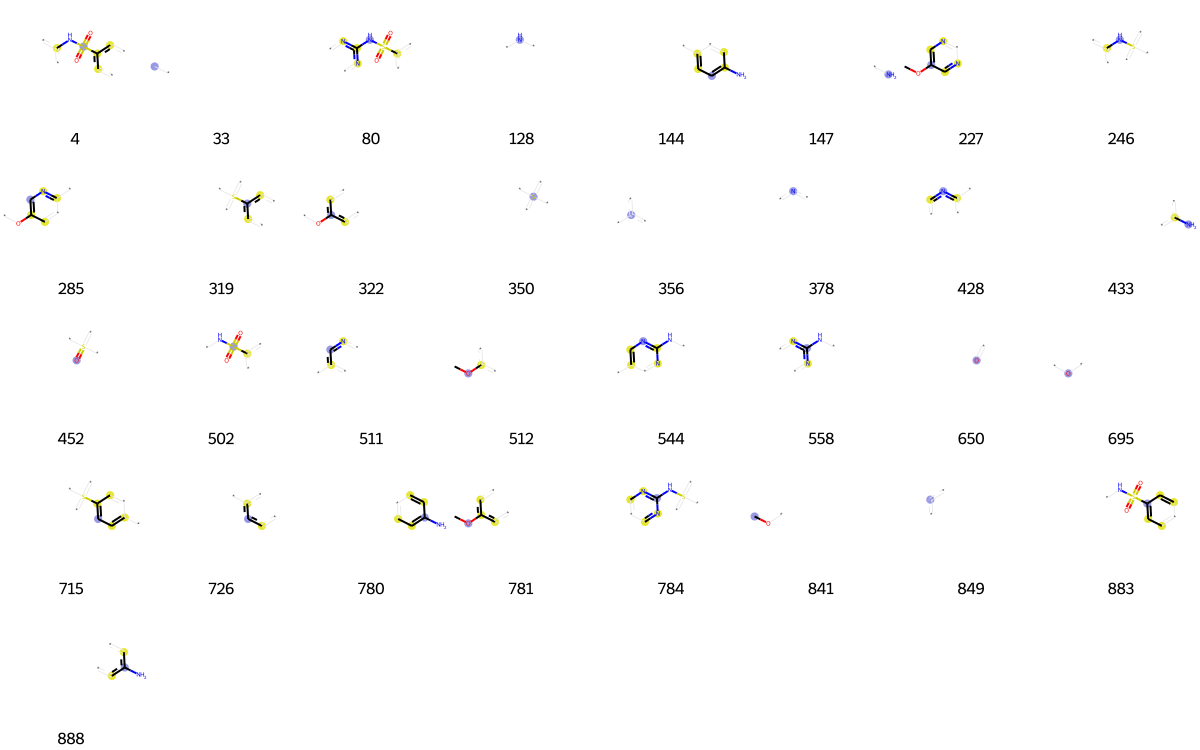

In [1189]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1190]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[53,
 80,
 84,
 147,
 158,
 191,
 210,
 222,
 226,
 233,
 238,
 254,
 268,
 299,
 350,
 357,
 390,
 452,
 463,
 488,
 489,
 492,
 533,
 545,
 592,
 610,
 650,
 656,
 695,
 740,
 807,
 808,
 820,
 838,
 839,
 869,
 882,
 895,
 897,
 926,
 952,
 953,
 981,
 1019]

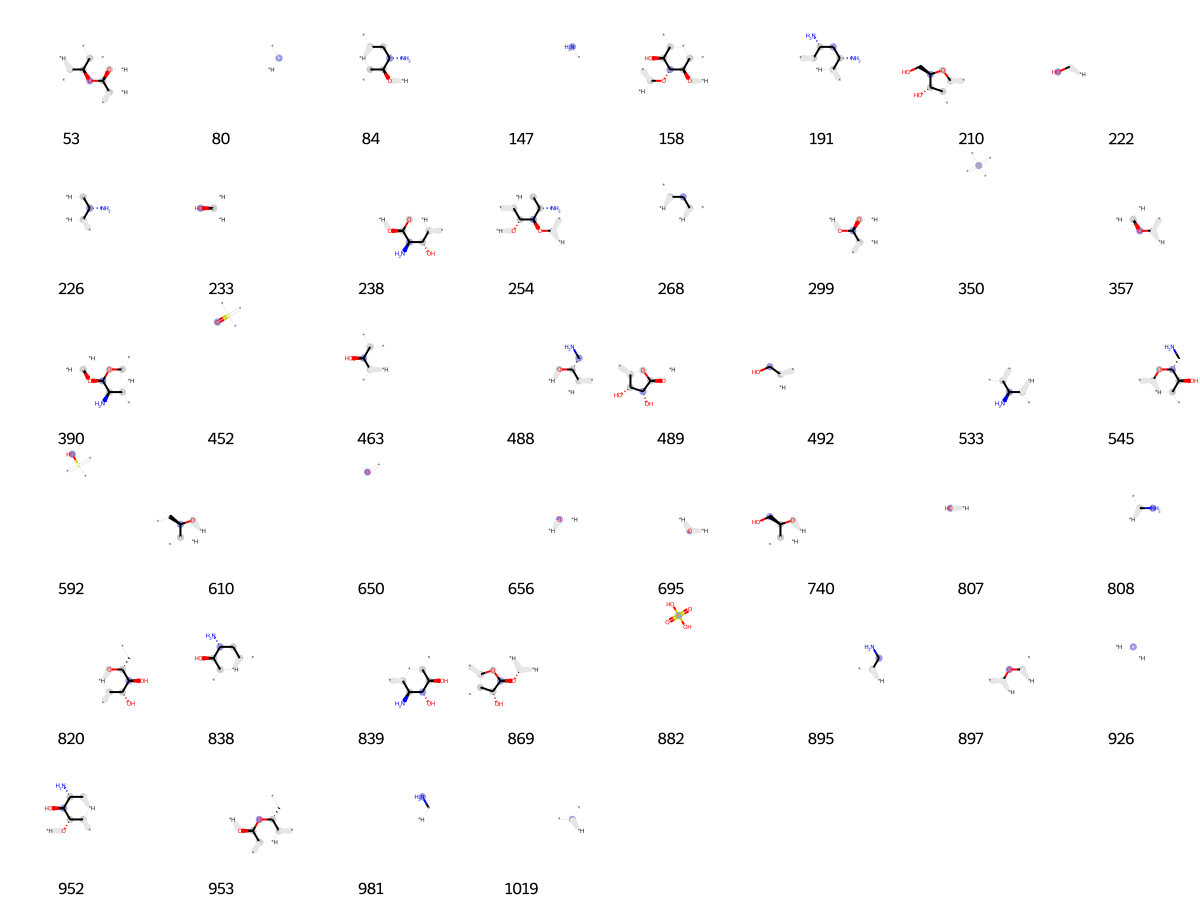

In [1191]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1192]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 3,
 33,
 62,
 80,
 205,
 212,
 221,
 231,
 249,
 278,
 283,
 287,
 288,
 314,
 327,
 335,
 341,
 356,
 370,
 456,
 512,
 587,
 636,
 649,
 650,
 694,
 695,
 714,
 739,
 791,
 823,
 826,
 830,
 841,
 849,
 864,
 875,
 922,
 926,
 935,
 946,
 1019]

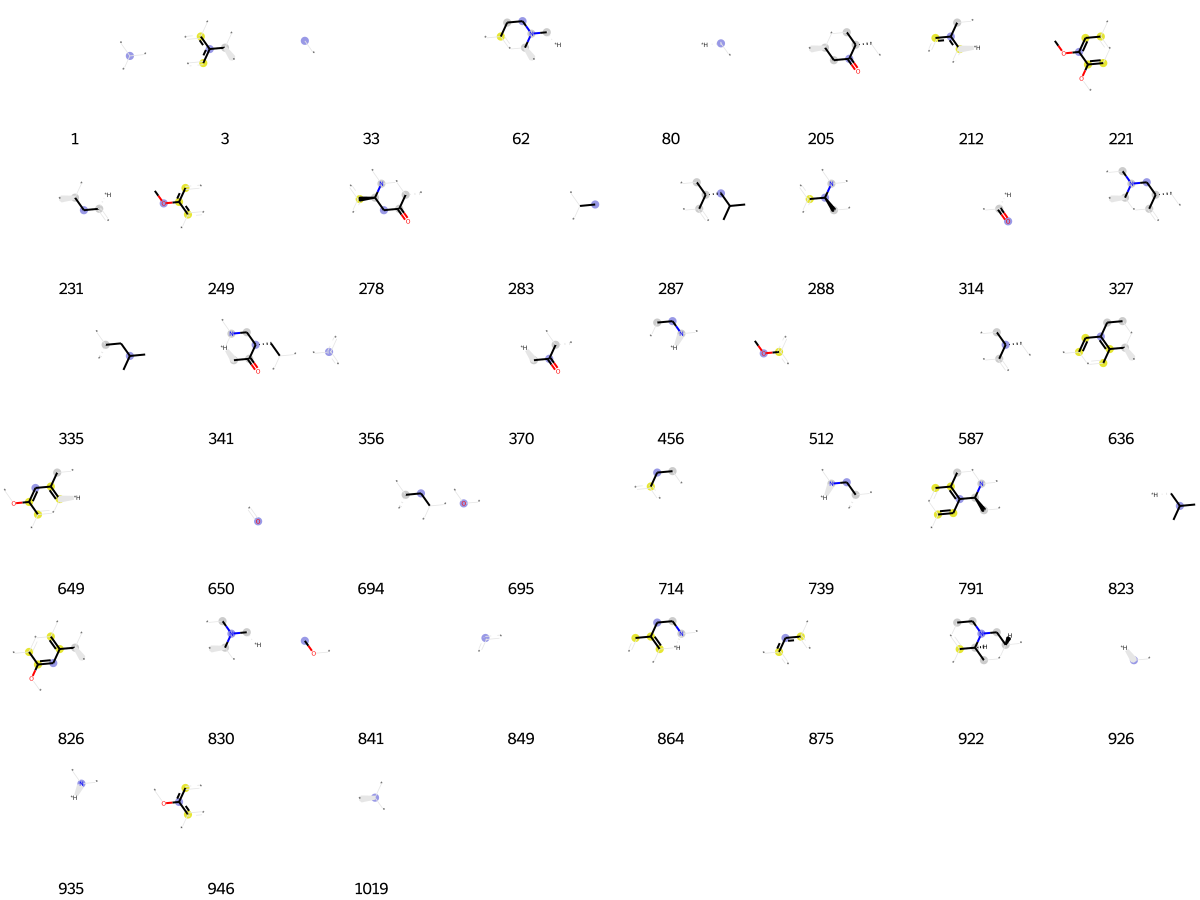

In [1193]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1194]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[3,
 4,
 64,
 131,
 175,
 190,
 206,
 212,
 233,
 356,
 371,
 389,
 421,
 457,
 478,
 549,
 556,
 619,
 650,
 684,
 694,
 714,
 726,
 807,
 849,
 892,
 893,
 921,
 926,
 976,
 998,
 1019]

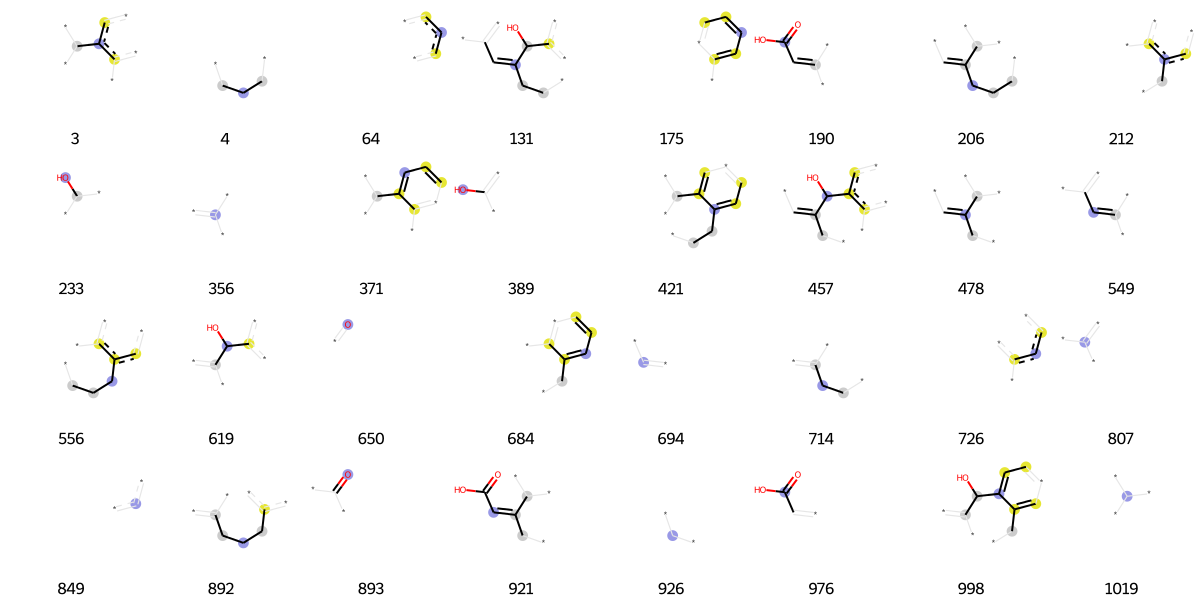

In [1195]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1196]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[0,
 33,
 43,
 80,
 90,
 119,
 139,
 219,
 273,
 310,
 325,
 328,
 333,
 356,
 364,
 378,
 476,
 489,
 515,
 548,
 579,
 649,
 651,
 652,
 677,
 693,
 726,
 728,
 730,
 741,
 744,
 747,
 754,
 806,
 849,
 855,
 875,
 881,
 913,
 915,
 927,
 932,
 935]

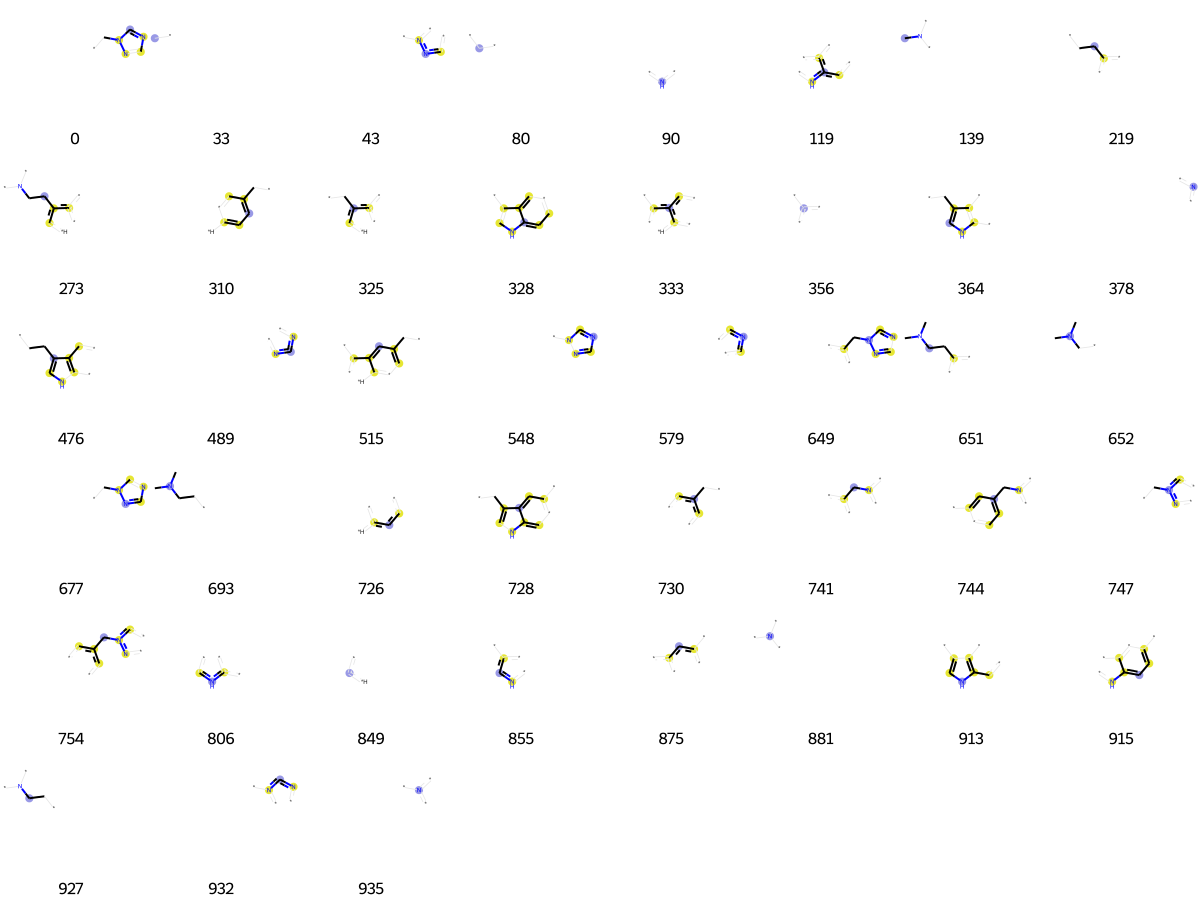

In [1197]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1198]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 33,
 64,
 69,
 75,
 80,
 86,
 119,
 175,
 216,
 223,
 243,
 245,
 247,
 259,
 263,
 314,
 341,
 356,
 389,
 452,
 540,
 557,
 650,
 675,
 698,
 713,
 726,
 739,
 807,
 849,
 858,
 867,
 887,
 893,
 944]

In [1199]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[10,
 14,
 33,
 121,
 172,
 207,
 212,
 246,
 301,
 335,
 389,
 407,
 456,
 511,
 552,
 565,
 650,
 656,
 766,
 787,
 795,
 801,
 807,
 893,
 897,
 926,
 935,
 944,
 985,
 1019]

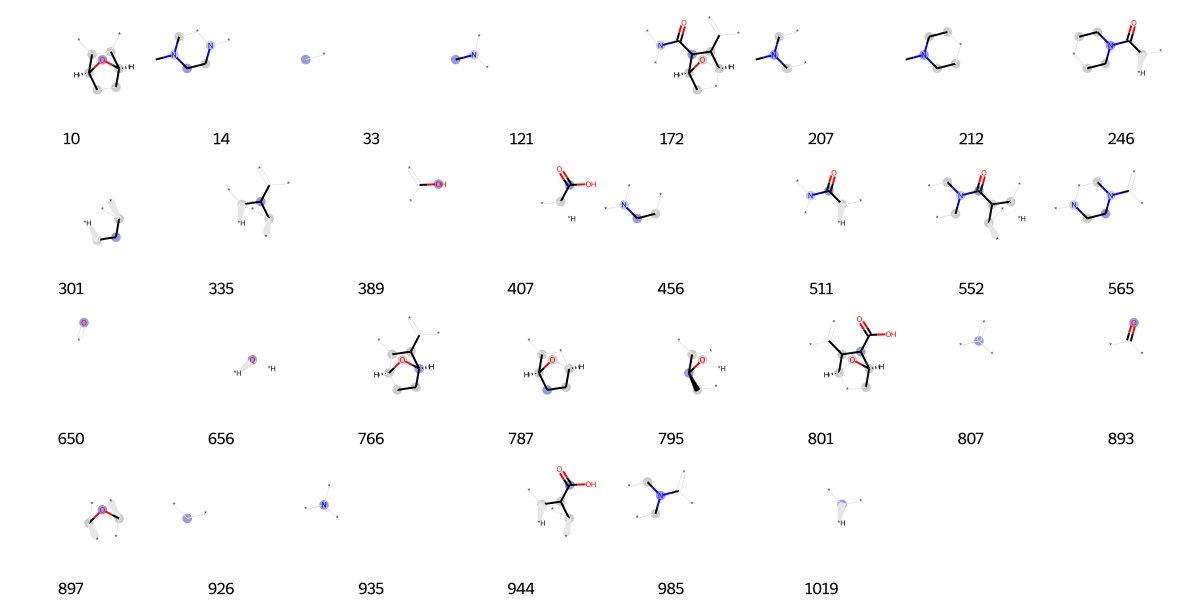

In [1200]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1201]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 26,
 33,
 41,
 64,
 80,
 102,
 119,
 121,
 147,
 175,
 222,
 268,
 278,
 301,
 338,
 341,
 356,
 381,
 389,
 396,
 482,
 557,
 601,
 650,
 658,
 695,
 726,
 803,
 807,
 838,
 849,
 886,
 892,
 893,
 926,
 935,
 1019]

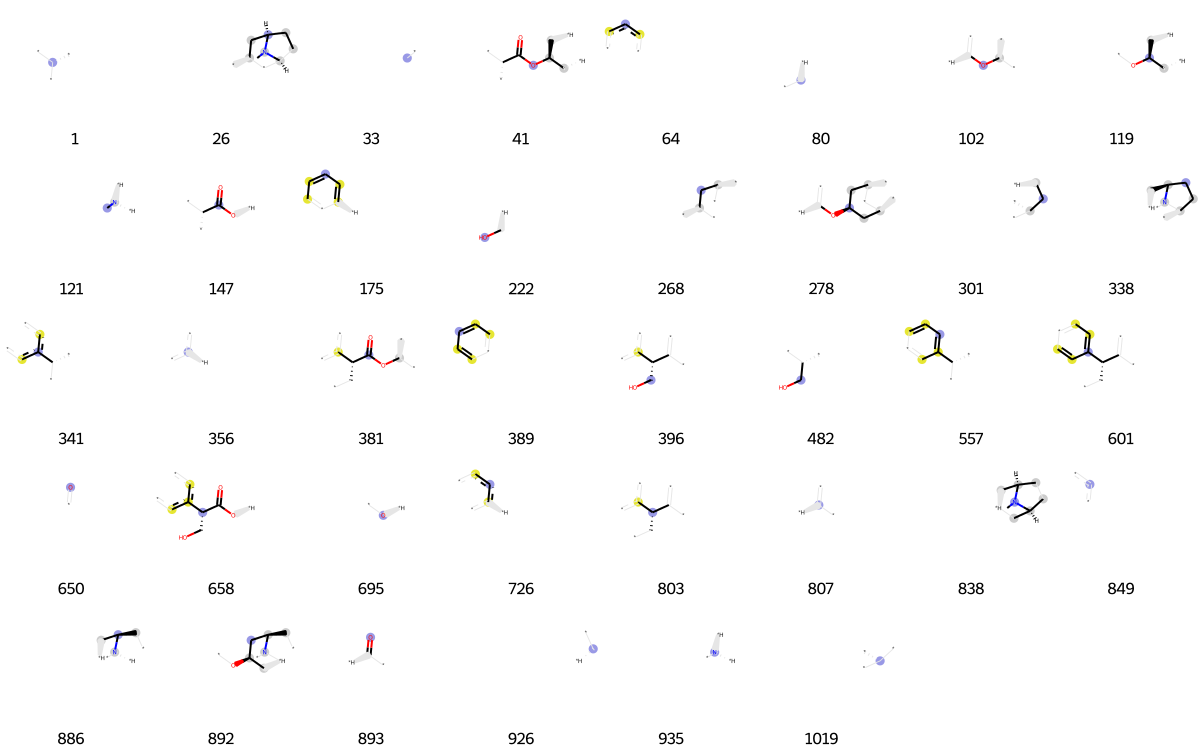

In [1202]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1203]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 33,
 44,
 46,
 53,
 114,
 120,
 128,
 134,
 147,
 191,
 216,
 236,
 245,
 283,
 319,
 356,
 361,
 393,
 429,
 486,
 539,
 561,
 573,
 640,
 650,
 657,
 659,
 668,
 695,
 726,
 777,
 792,
 807,
 809,
 816,
 843,
 849,
 875,
 893,
 903,
 904]

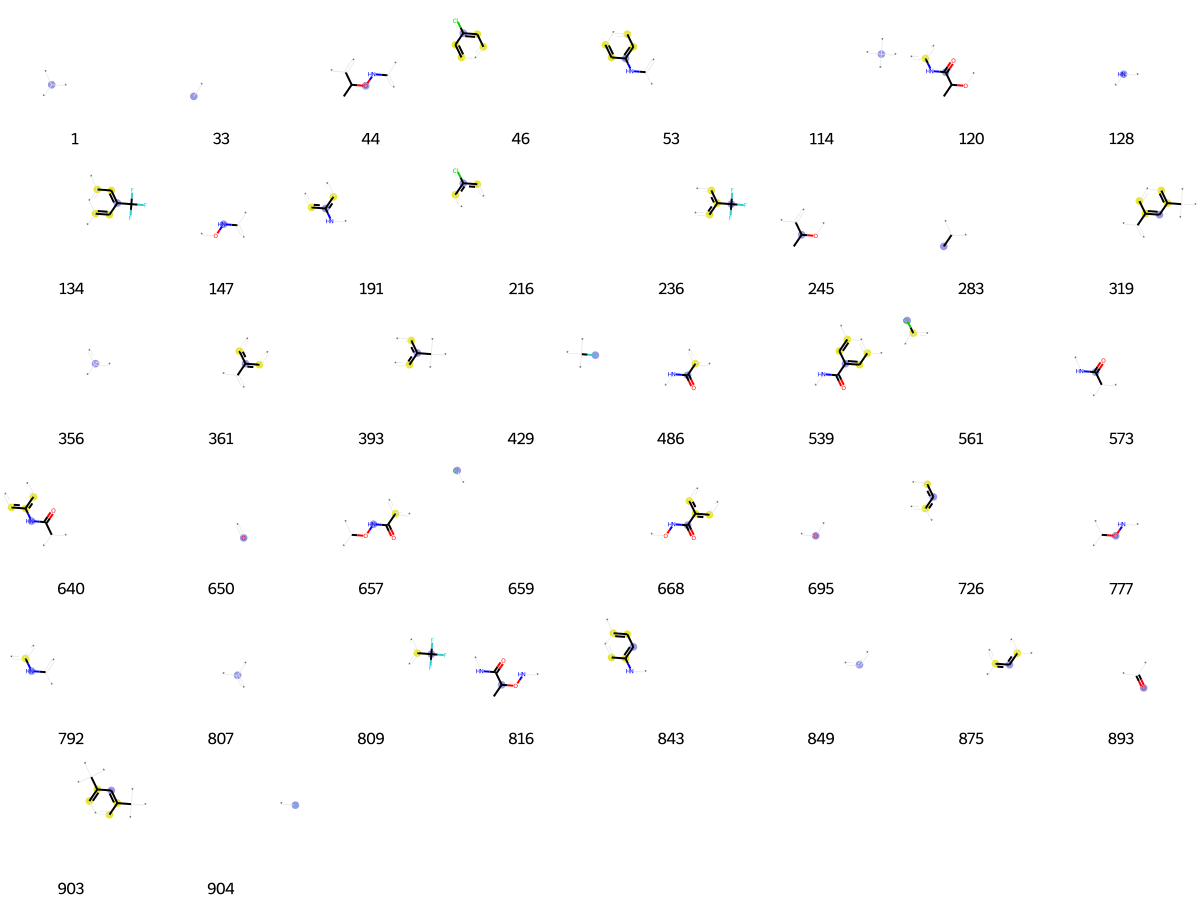

In [1204]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1205]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 30,
 64,
 80,
 114,
 147,
 175,
 236,
 298,
 322,
 341,
 356,
 383,
 389,
 393,
 429,
 538,
 557,
 641,
 664,
 684,
 695,
 718,
 726,
 737,
 739,
 809,
 816,
 849,
 887,
 904,
 968,
 981]

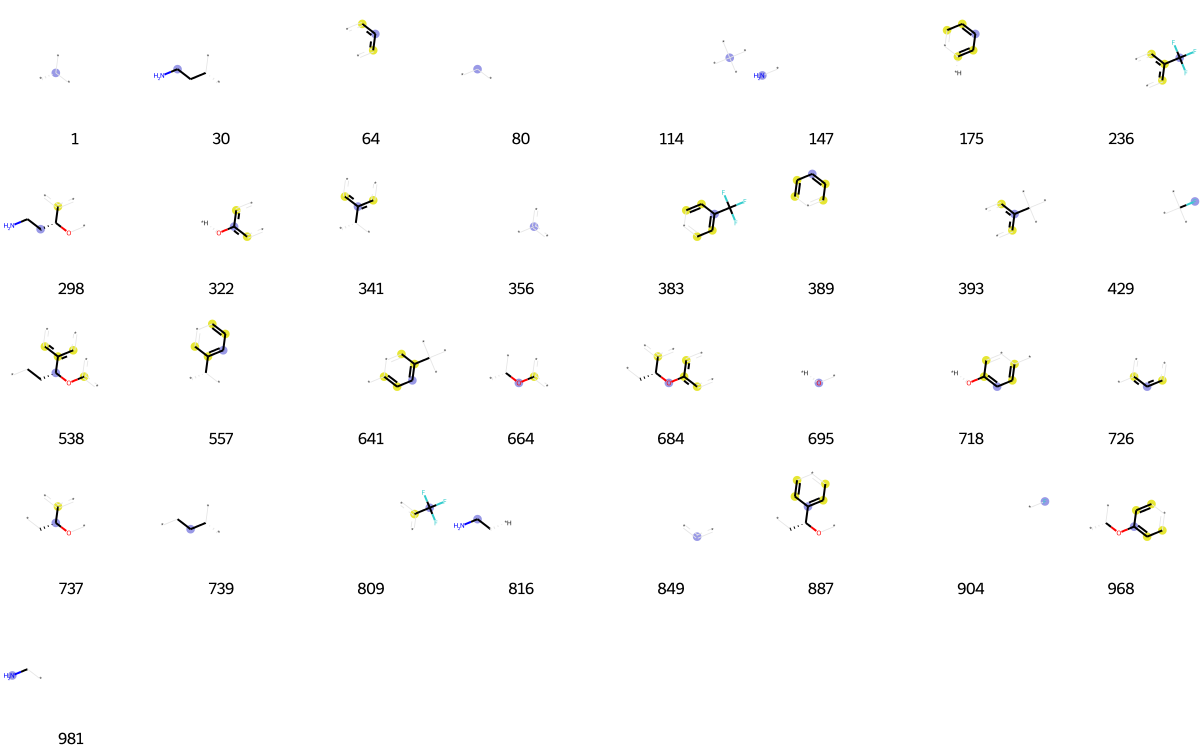

In [1206]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1207]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[4,
 29,
 33,
 64,
 80,
 121,
 143,
 175,
 207,
 271,
 301,
 356,
 385,
 389,
 397,
 446,
 456,
 484,
 508,
 561,
 588,
 623,
 650,
 660,
 675,
 722,
 726,
 739,
 789,
 807,
 834,
 849,
 893,
 908,
 917,
 926,
 935,
 949,
 1017,
 1019,
 1020]

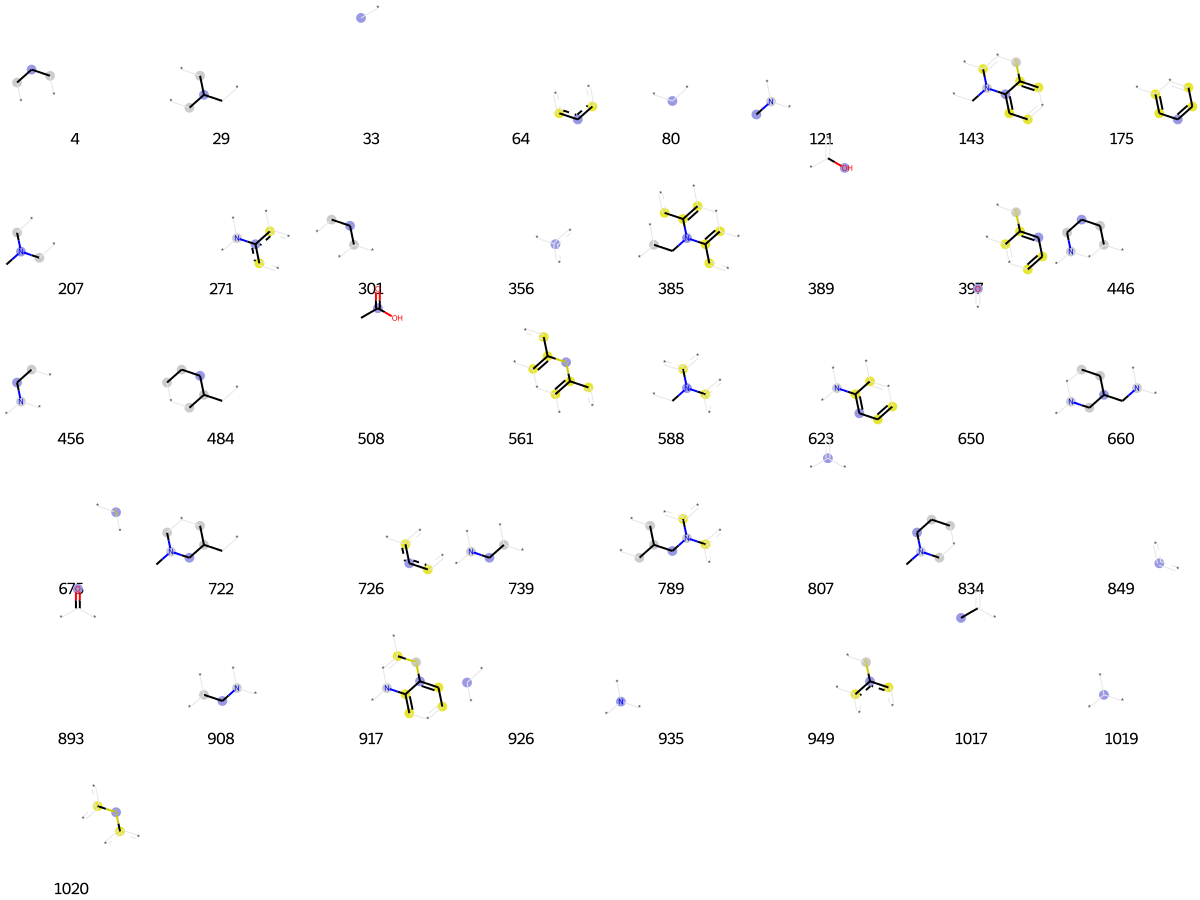

In [1208]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1209]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[33,
 36,
 50,
 80,
 84,
 87,
 88,
 130,
 138,
 141,
 157,
 182,
 195,
 222,
 242,
 250,
 261,
 262,
 268,
 285,
 287,
 301,
 314,
 356,
 370,
 408,
 412,
 479,
 504,
 519,
 532,
 540,
 585,
 588,
 622,
 640,
 650,
 671,
 714,
 782,
 807,
 841,
 849,
 860,
 885,
 893,
 926,
 940,
 948,
 973,
 1002,
 1019]

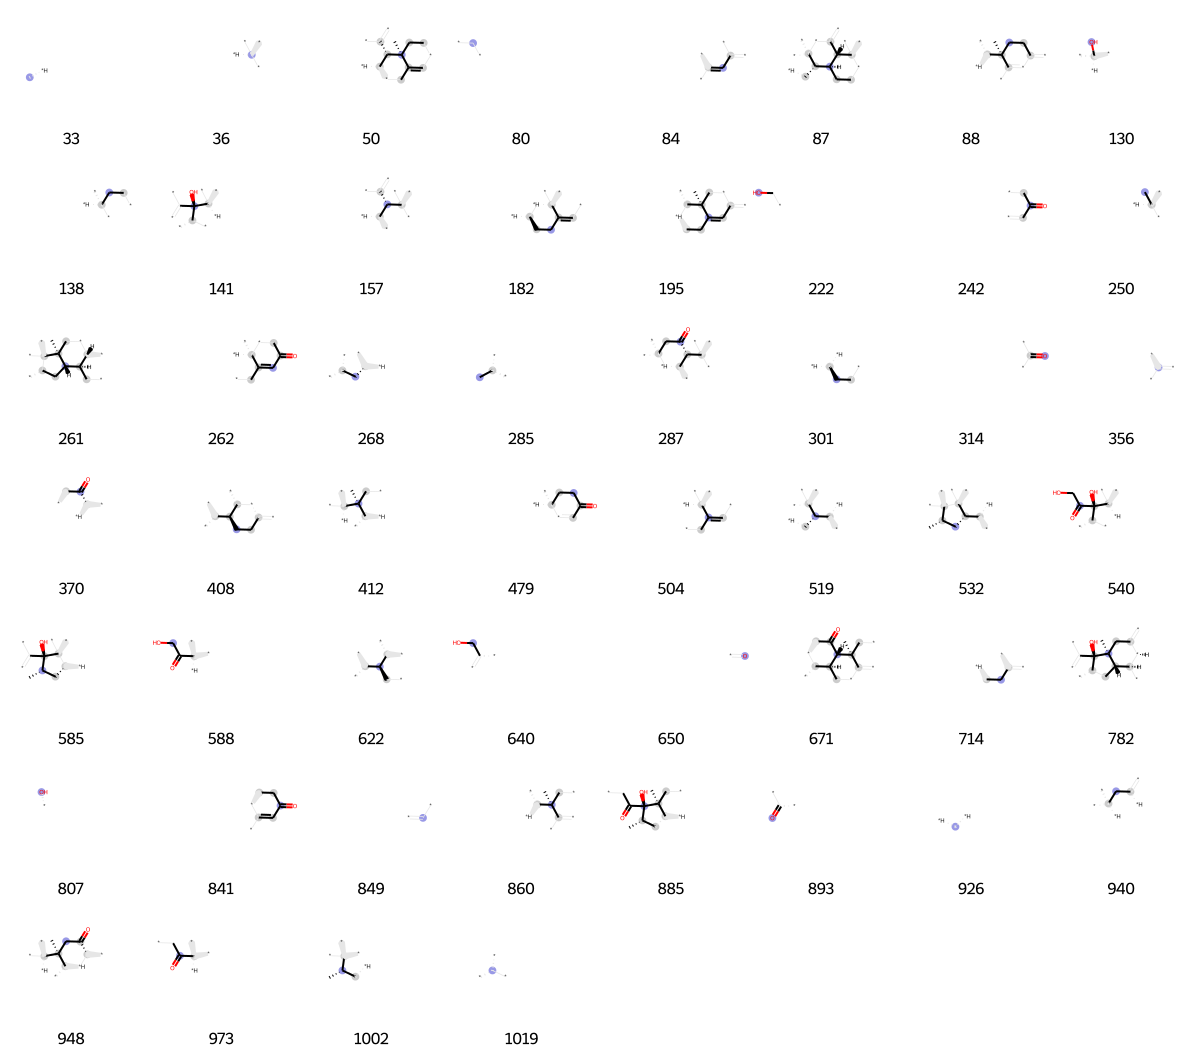

In [1210]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [1211]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[67,
 144,
 147,
 171,
 189,
 202,
 205,
 356,
 433,
 544,
 578,
 583,
 647,
 650,
 715,
 725,
 726,
 790,
 807,
 849,
 875,
 888,
 893,
 931,
 967]

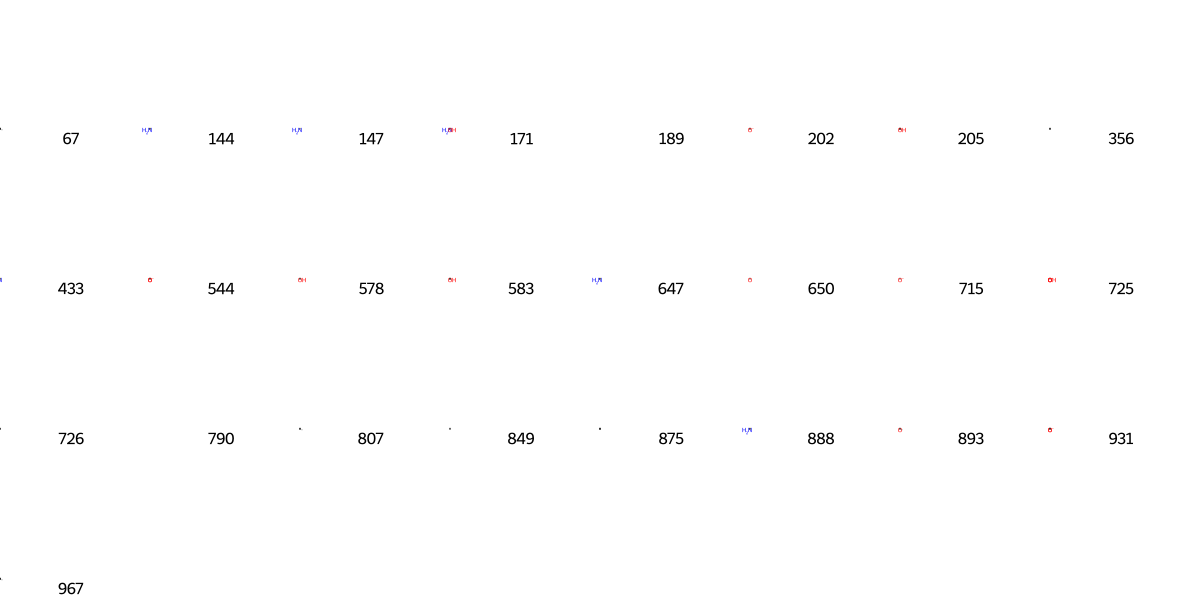

In [1212]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1213]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[21,
 53,
 64,
 80,
 90,
 128,
 171,
 175,
 191,
 200,
 219,
 222,
 250,
 310,
 356,
 361,
 423,
 473,
 486,
 574,
 641,
 650,
 672,
 673,
 715,
 726,
 730,
 745,
 753,
 769,
 771,
 785,
 790,
 792,
 807,
 838,
 843,
 847,
 849,
 867,
 893,
 939,
 947,
 954,
 967]

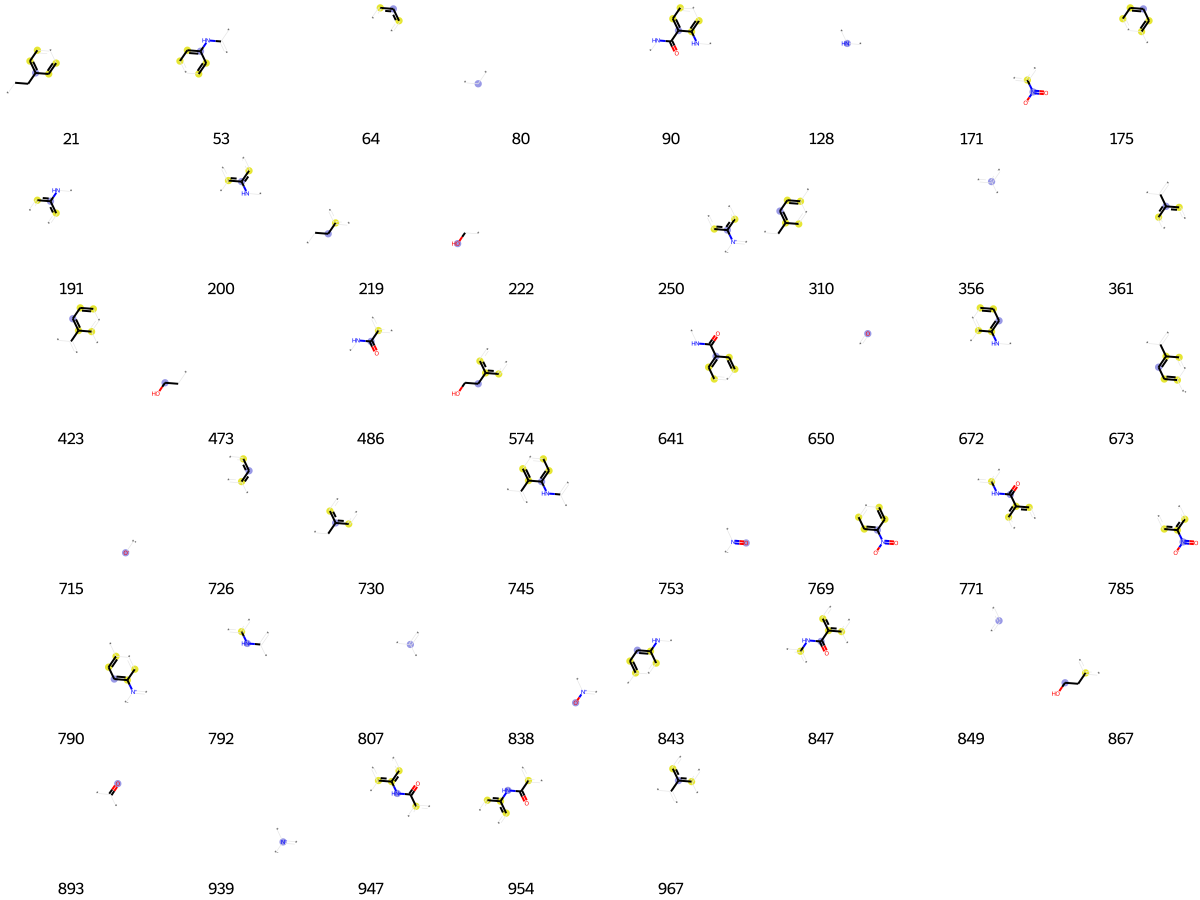

In [1214]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1215]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[64,
 110,
 140,
 147,
 175,
 187,
 287,
 309,
 356,
 423,
 578,
 583,
 650,
 726,
 807,
 849,
 893,
 967]

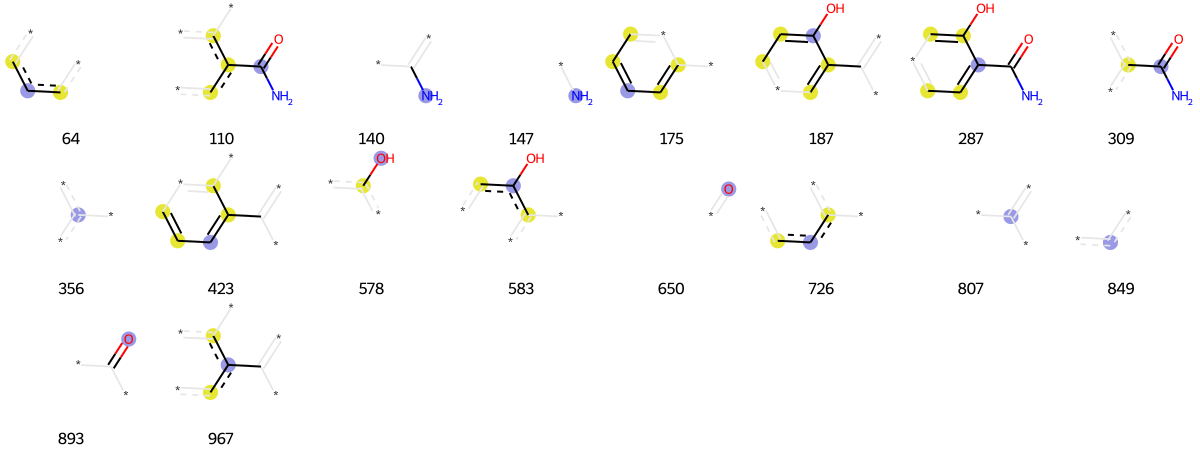

In [1216]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1217]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[33,
 37,
 43,
 70,
 80,
 114,
 147,
 154,
 193,
 214,
 294,
 310,
 315,
 356,
 392,
 451,
 514,
 578,
 580,
 583,
 589,
 610,
 650,
 675,
 695,
 698,
 726,
 730,
 794,
 807,
 849,
 875,
 888,
 893]

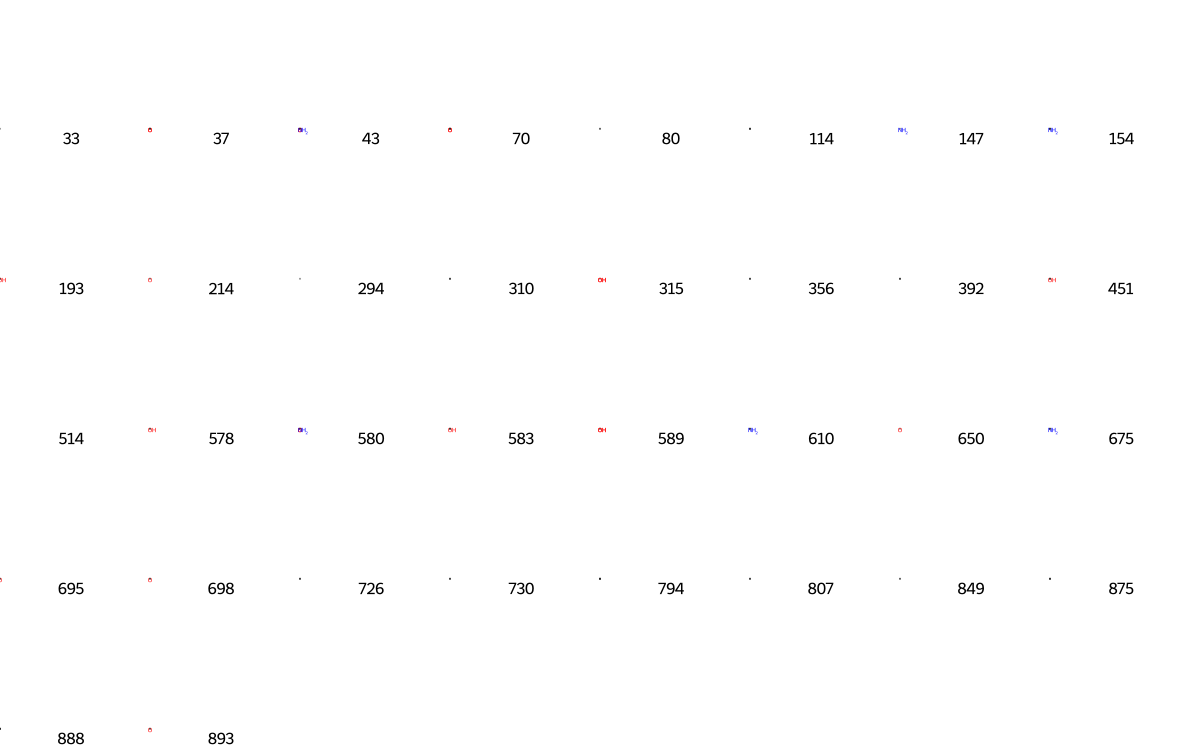

In [1218]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])